# Reddit Dataset Visualization

Before implementing the TGN model, let's explore and visualize the Reddit dataset that will be used for training and evaluation.

In [1]:
# Import necessary libraries for data exploration
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the style for our visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the Reddit dataset
def load_reddit_dataset(verbose=True):
    """Load and perform basic exploration of the Reddit dataset"""
    try:
        # Set absolute paths to the Reddit datasets using the workspace structure
        project_root = '/home/strix/Workspace/Projects/CommunityDetection'
        
        title_path = os.path.join(project_root, 'data', 'soc-redditHyperlinks-title.tsv')
        body_path = os.path.join(project_root, 'data', 'soc-redditHyperlinks-body.tsv')
        tgat_path = os.path.join(project_root, 'data', 'reddit_TGAT.csv')
        
        if verbose:
            print(f"Looking for data files at:")
            print(f"  - {title_path}")
            print(f"  - {body_path}")
            print(f"  - {tgat_path}")
        
        # Try loading different versions of the dataset
        datasets = {}
        
        if os.path.exists(title_path):
            title_df = pd.read_csv(title_path, sep='\t')
            datasets['title'] = title_df
            if verbose:
                print(f"Loaded Reddit title hyperlinks dataset with {len(title_df)} edges")
        
        if os.path.exists(body_path):
            body_df = pd.read_csv(body_path, sep='\t')
            datasets['body'] = body_df
            if verbose:
                print(f"Loaded Reddit body hyperlinks dataset with {len(body_df)} edges")
                
        if os.path.exists(tgat_path):
            tgat_df = pd.read_csv(tgat_path)
            datasets['tgat'] = tgat_df
            if verbose:
                print(f"Loaded Reddit TGAT dataset with {len(tgat_df)} edges")
        
        # If no datasets were found, try an alternative approach with relative paths
        if not datasets:
            print("Could not find data files with absolute path, trying relative paths...")
            # Try to find the data directory relative to the notebook directory
            notebook_dir = os.getcwd()
            alternative_project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
            
            title_path = os.path.join(alternative_project_root, 'data', 'soc-redditHyperlinks-title.tsv')
            body_path = os.path.join(alternative_project_root, 'data', 'soc-redditHyperlinks-body.tsv')
            tgat_path = os.path.join(alternative_project_root, 'data', 'reddit_TGAT.csv')
            
            if verbose:
                print(f"Trying alternative data paths:")
                print(f"  - {title_path}")
                print(f"  - {body_path}")
                print(f"  - {tgat_path}")
            
            if os.path.exists(title_path):
                title_df = pd.read_csv(title_path, sep='\t')
                datasets['title'] = title_df
                if verbose:
                    print(f"Loaded Reddit title hyperlinks dataset with {len(title_df)} edges")
            
            if os.path.exists(body_path):
                body_df = pd.read_csv(body_path, sep='\t')
                datasets['body'] = body_df
                if verbose:
                    print(f"Loaded Reddit body hyperlinks dataset with {len(body_df)} edges")
                    
            if os.path.exists(tgat_path):
                tgat_df = pd.read_csv(tgat_path)
                datasets['tgat'] = tgat_df
                if verbose:
                    print(f"Loaded Reddit TGAT dataset with {len(tgat_df)} edges")
            
            # If still no datasets, raise an error
            if not datasets:
                raise FileNotFoundError("No Reddit dataset files found in either the absolute or relative data directory paths")
            
        # Return all loaded datasets
        return datasets
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        # Print the current working directory for debugging
        print(f"Current working directory: {os.getcwd()}")
        # Add additional error context
        import traceback
        print(f"Traceback: {traceback.format_exc()}")
        return None

# Load the datasets
reddit_datasets = load_reddit_dataset()

# Choose the title dataset for our analysis
if reddit_datasets is None:
    print("Could not load the Reddit dataset. Please check the file paths and data directory.")
else:
    if 'title' in reddit_datasets:
        reddit_df = reddit_datasets['title']
        print("\nFirst few rows of the Reddit title hyperlinks dataset:")
        display(reddit_df.head())
        
        # Display dataset information
        print("\nDataset information:")
        print(f"Shape: {reddit_df.shape}")
        print(f"Columns: {reddit_df.columns.tolist()}")
        
        # Check for missing values
        print("\nMissing values:")
        print(reddit_df.isnull().sum())
        
        # Display data types
        print("\nData types:")
        print(reddit_df.dtypes)
    else:
        print("Reddit title dataset not found in the loaded datasets.")

Looking for data files at:
  - /home/strix/Workspace/Projects/CommunityDetection/data/soc-redditHyperlinks-title.tsv
  - /home/strix/Workspace/Projects/CommunityDetection/data/soc-redditHyperlinks-body.tsv
  - /home/strix/Workspace/Projects/CommunityDetection/data/reddit_TGAT.csv
Loaded Reddit title hyperlinks dataset with 571927 edges
Loaded Reddit body hyperlinks dataset with 286561 edges
Loaded Reddit TGAT dataset with 672447 edges

First few rows of the Reddit title hyperlinks dataset:


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."



Dataset information:
Shape: (571927, 6)
Columns: ['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES']

Missing values:
SOURCE_SUBREDDIT    0
TARGET_SUBREDDIT    0
POST_ID             0
TIMESTAMP           0
LINK_SENTIMENT      0
PROPERTIES          0
dtype: int64

Data types:
SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object


In [2]:
# Import needed libraries and define the device variable at the beginning of the notebook
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


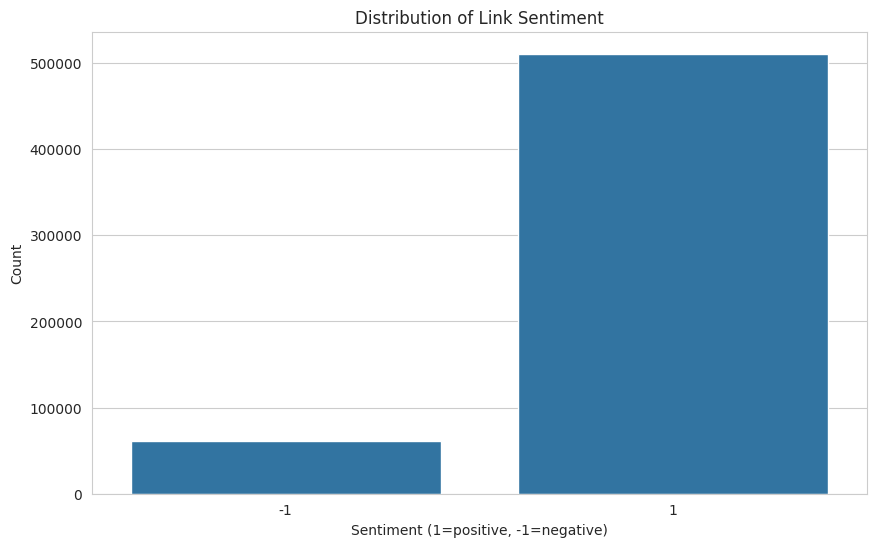

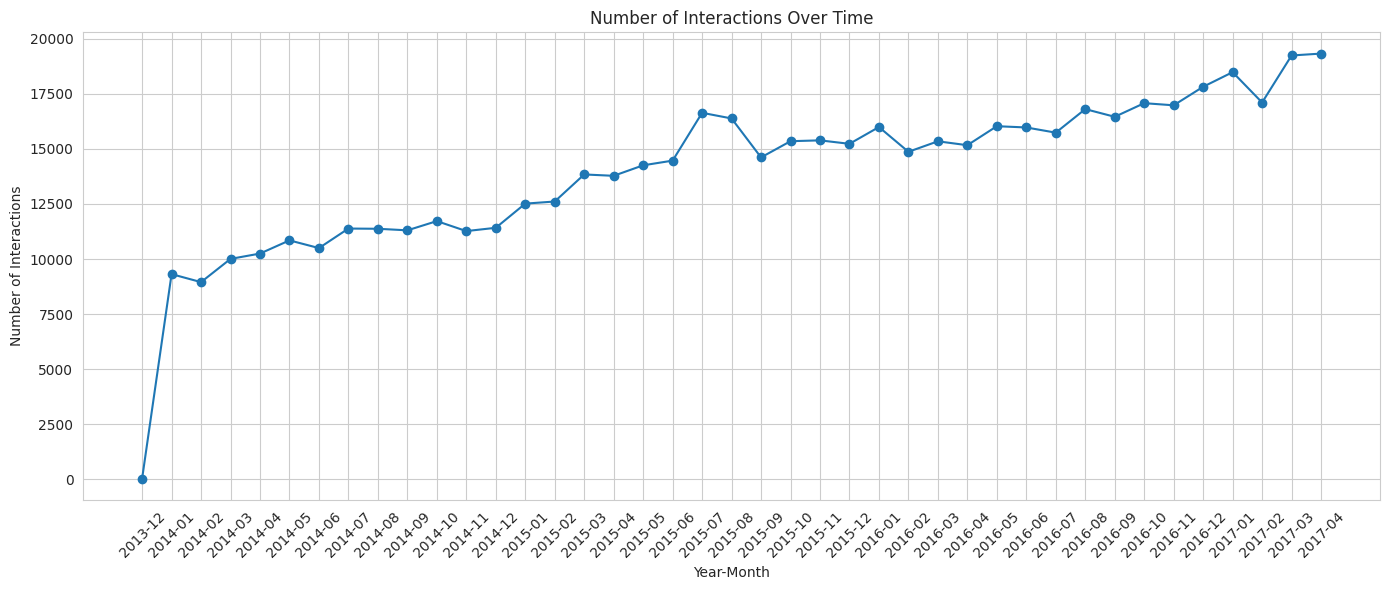

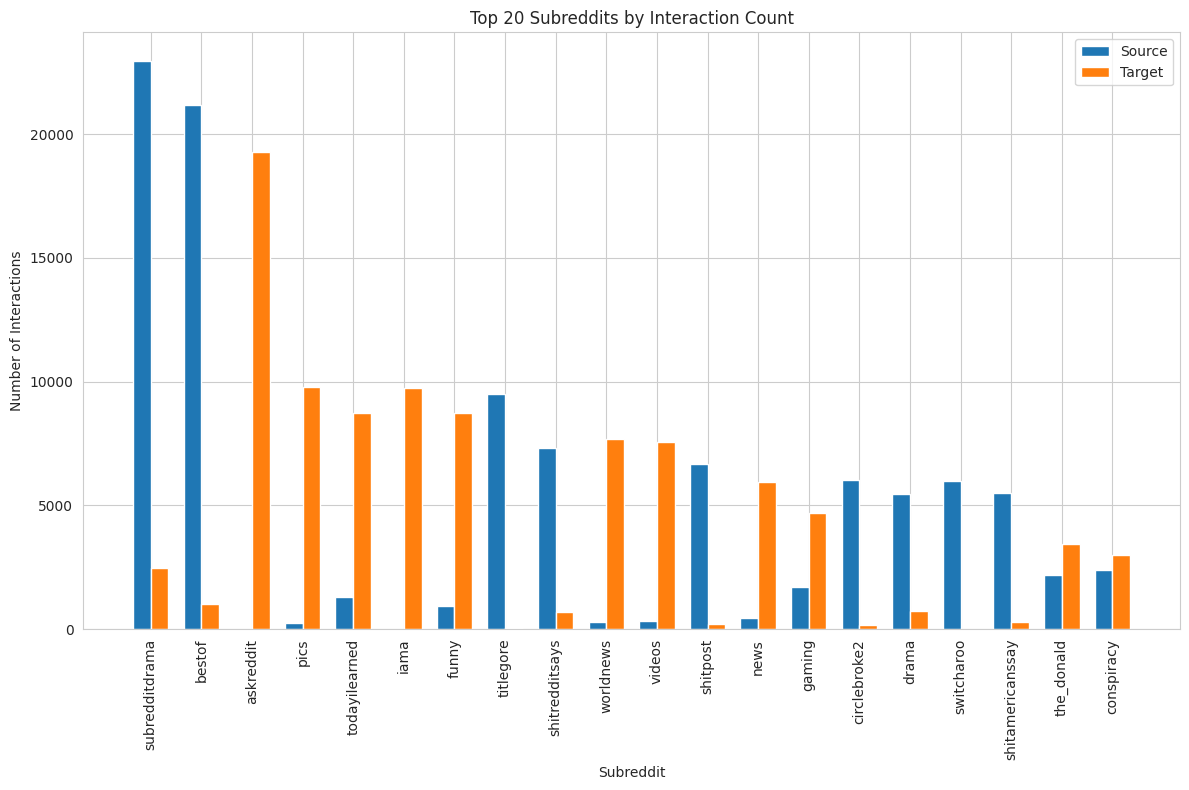


Sample of PROPERTIES values:
25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,4.75,0.0,0.0,1.0,0.0,25.0,4.0,10.0075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,4.0,5.0625,4.0,0.25,2.0,1.0,50.0,8.0,12.0075,0.195,0.0,0.4404,0.23529411764705882,0.058823529411764705,0.058823529411764705,0.0,0.0,0.058823529411764705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17647058823529413,0.0,0.0,0.0,0.0,0.0,0.058823529411764705,0.0,0.0,0.0,0.11764705882352941,0.058823529411764705,0.058823529411764705,0.0,0.058823529411764705,0.0,0.11764705882352941,0.0,0.058823529411764705,0.0,0.058823529411764705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058823529411764705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100.0,88.0,0

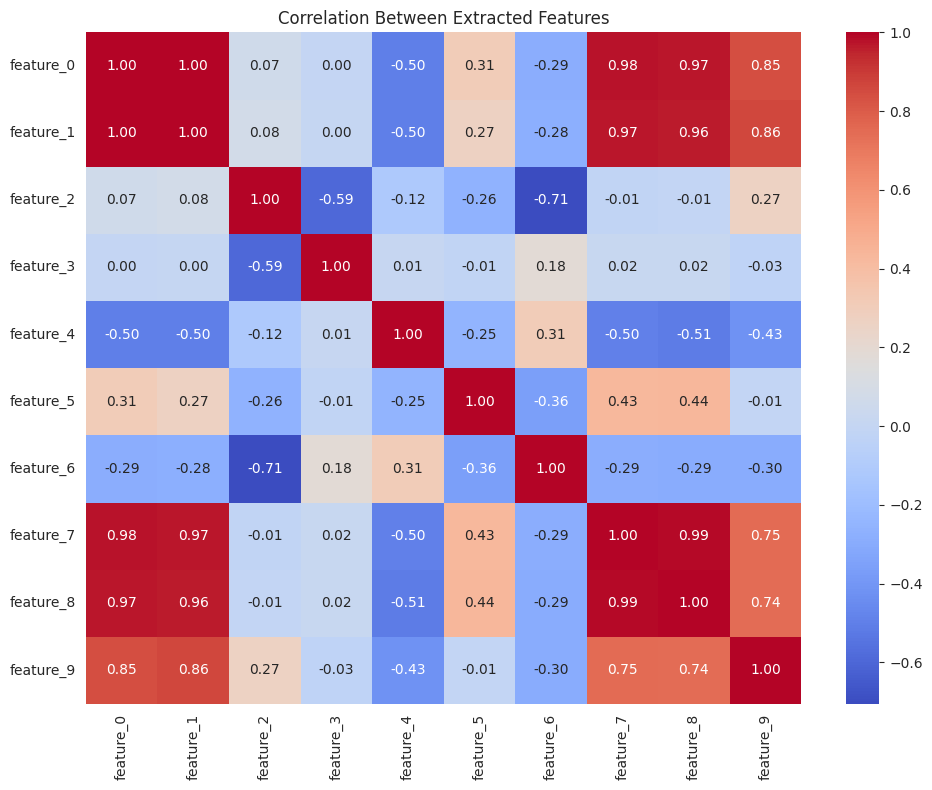


Total number of unique subreddits (nodes): 54075

Data preparation for TGN:
- Dataset timespan: 2013-12-31 16:20:20 to 2017-04-30 16:47:50
- Number of interactions: 571927
- Network density: 0.000196

Data processed and ready for TGN model training.
Number of unique subreddits (nodes): 54075
Extracting edge features...
Creating node features...
Data split: 400348 training, 85789 validation, 85790 test samples
Creating datasets...
DataLoaders created with batch size 64
Data processing complete!


In [3]:
# Compute and visualize basic statistics of the Reddit dataset
if 'reddit_df' in locals():
    # 1. Distribution of link sentiment
    plt.figure(figsize=(10, 6))
    sns.countplot(x='LINK_SENTIMENT', data=reddit_df)
    plt.title('Distribution of Link Sentiment')
    plt.xlabel('Sentiment (1=positive, -1=negative)')
    plt.ylabel('Count')
    plt.show()
    
    # 2. Timeline of interactions
    reddit_df['TIMESTAMP'] = pd.to_datetime(reddit_df['TIMESTAMP'])
    reddit_df['year_month'] = reddit_df['TIMESTAMP'].dt.to_period('M')
    
    # Count interactions by month
    monthly_counts = reddit_df.groupby('year_month').size().reset_index(name='count')
    monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)
    
    plt.figure(figsize=(14, 6))
    plt.plot(monthly_counts['year_month'], monthly_counts['count'], marker='o')
    plt.title('Number of Interactions Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Interactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Top subreddits by interaction count
    # Count interactions for each subreddit (both source and target)
    source_counts = reddit_df['SOURCE_SUBREDDIT'].value_counts().reset_index()
    source_counts.columns = ['subreddit', 'source_count']
    
    target_counts = reddit_df['TARGET_SUBREDDIT'].value_counts().reset_index()
    target_counts.columns = ['subreddit', 'target_count']
    
    # Merge the counts
    subreddit_counts = pd.merge(source_counts, target_counts, on='subreddit', how='outer').fillna(0)
    subreddit_counts['total_interactions'] = subreddit_counts['source_count'] + subreddit_counts['target_count']
    subreddit_counts = subreddit_counts.sort_values('total_interactions', ascending=False)
    
    # Plot top 20 subreddits by total interactions
    top_subreddits = subreddit_counts.head(20)
    
    plt.figure(figsize=(12, 8))
    x = np.arange(len(top_subreddits))
    width = 0.35
    
    plt.bar(x - width/2, top_subreddits['source_count'], width, label='Source')
    plt.bar(x + width/2, top_subreddits['target_count'], width, label='Target')
    
    plt.xlabel('Subreddit')
    plt.ylabel('Number of Interactions')
    plt.title('Top 20 Subreddits by Interaction Count')
    plt.xticks(x, top_subreddits['subreddit'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 4. Properties analysis
    # Check if PROPERTIES column exists and analyze if present
    if 'PROPERTIES' in reddit_df.columns:
        # Sample a few rows to understand the format
        print("\nSample of PROPERTIES values:")
        for prop in reddit_df['PROPERTIES'].head(3):
            print(prop)
        
        # Extract first 10 numeric properties for each interaction
        def extract_features(prop_str, n_features=10):
            try:
                values = prop_str.split(',')[:n_features]
                # Ensure consistent float conversion, handle non-numeric gracefully
                return [float(v) if v.replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0 for v in values]
            except Exception as e: # Catch any exception during parsing
                return [0.0] * n_features # Return default if parsing fails
        
        # Extract a sample of properties for analysis
        sample_size = min(1000, len(reddit_df))
        sample_df = reddit_df.sample(sample_size, random_state=42)
        
        # Extract features from sample
        feature_lists = [extract_features(prop) for prop in sample_df['PROPERTIES']]
        features_array = np.array(feature_lists)
        
        # Create feature names
        feature_names = [f'feature_{i}' for i in range(features_array.shape[1])]
        
        # Create a heatmap of feature correlations
        features_df = pd.DataFrame(features_array, columns=feature_names)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Extracted Features')
        plt.tight_layout()
        plt.show()
    
    # 5. Network analysis: Prepare data for TGN
    # Create a mapping of subreddit names to indices
    all_subreddits = pd.concat([reddit_df['SOURCE_SUBREDDIT'], reddit_df['TARGET_SUBREDDIT']]).unique()
    node_mapping = {subreddit: idx for idx, subreddit in enumerate(all_subreddits)}
    
    print(f"\nTotal number of unique subreddits (nodes): {len(node_mapping)}")
    
    # Convert timestamps to numerical format
    reddit_df['TIMESTAMP_SECONDS'] = reddit_df['TIMESTAMP'].astype(int) / 10**9
    
    # Sort by timestamp (crucial for TGN)
    reddit_df = reddit_df.sort_values('TIMESTAMP_SECONDS')
    
    # Prepare processed data for TGN
    print("\nData preparation for TGN:")
    print(f"- Dataset timespan: {reddit_df['TIMESTAMP'].min()} to {reddit_df['TIMESTAMP'].max()}")
    print(f"- Number of interactions: {len(reddit_df)}")
    print(f"- Network density: {len(reddit_df) / (len(node_mapping) * (len(node_mapping) - 1)):.6f}")
    
    # Save the processed dataframe and node mapping for later use
    processed_reddit_df = reddit_df
    print("\nData processed and ready for TGN model training.")
    
    # Process the Reddit dataset for TGN with GPU acceleration if available
    if 'reddit_df' in locals():
        # Set configuration parameters
        edge_feat_dim = 10   # Dimension of edge features
        node_feat_dim = 50   # Dimension of node features
        
        # Convert timestamps to datetime format
        reddit_df['TIMESTAMP'] = pd.to_datetime(reddit_df['TIMESTAMP'])
        
        # Create a node mapping (subreddit names to indices)
        all_subreddits = pd.concat([reddit_df['SOURCE_SUBREDDIT'], reddit_df['TARGET_SUBREDDIT']]).unique()
        node_mapping = {subreddit: idx for idx, subreddit in enumerate(all_subreddits)}
        
        # Update the num_nodes parameter
        num_nodes = len(node_mapping)
        print(f"Number of unique subreddits (nodes): {num_nodes}")
        
        # Convert timestamps to numerical format
        reddit_df['TIMESTAMP_SECONDS'] = reddit_df['TIMESTAMP'].astype(int) / 10**9
        
        # Sort by timestamp (crucial for TGN)
        reddit_df = reddit_df.sort_values('TIMESTAMP_SECONDS')
        
        # Map subreddit names to node indices
        reddit_df['src_idx'] = reddit_df['SOURCE_SUBREDDIT'].map(node_mapping)
        reddit_df['dst_idx'] = reddit_df['TARGET_SUBREDDIT'].map(node_mapping)
        
        # Extract features from PROPERTIES column
        def extract_features(prop_str, n_features=10):
            try:
                values = prop_str.split(',')[:n_features]
                # Ensure consistent float conversion, handle non-numeric gracefully
                return [float(v) if v.replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0 for v in values]
            except Exception as e: # Catch any exception during parsing
                return [0.0] * n_features # Return default if parsing fails
        
        print("Extracting edge features...")
        # Extract edge features
        # This is the full array of edge features, aligned with the original reddit_df
        edge_features_full = np.array([extract_features(prop) for prop in reddit_df['PROPERTIES']])
        
        print("Creating node features...")
        # Create simple random node features
        np.random.seed(42)  # For reproducibility
        node_features = np.random.randn(num_nodes, node_feat_dim).astype(np.float32)  # Use float32 for GPU efficiency
        
        # Split data into train/val/test
        train_ratio, val_ratio = 0.7, 0.15
        n_samples = len(reddit_df)
        train_end = int(n_samples * train_ratio)
        val_end = int(n_samples * (train_ratio + val_ratio))
        
        train_df = reddit_df.iloc[:train_end]
        val_df = reddit_df.iloc[train_end:val_end]
        test_df = reddit_df.iloc[val_end:]
        
        print(f"Data split: {len(train_df)} training, {len(val_df)} validation, {len(test_df)} test samples")
        
        # Create PyTorch dataset classes with GPU support
        class TemporalEdgeDataset(torch.utils.data.Dataset):
            def __init__(self, df_split, all_node_features, all_edge_features_for_original_df, device='cpu'):
                # df_split is train_df, val_df, or test_df. It still has its original index from reddit_df.
                # all_edge_features_for_original_df is the numpy array of all edge features (aligned with original full reddit_df)
                
                # Select edge features for the current df_split using its original indices
                # df_split.index.to_numpy() gives the original indices from reddit_df for the rows in this split.
                current_split_edge_features = all_edge_features_for_original_df[df_split.index.to_numpy()]
                self.edge_features = torch.FloatTensor(current_split_edge_features) # Now 0-indexed for this split
                
                # Store df_split with a reset index for 0-based iloc access in __getitem__
                self.df = df_split.reset_index(drop=True) # Now 0-indexed for iloc
                
                # Store the full node features array (typically kept on CPU here, moved to device in training loop)
                self.node_features_all = torch.FloatTensor(all_node_features) 
                self.device = device # Device for tensors returned by __getitem__ (though features often moved in batch)
                
            def __len__(self):
                return len(self.df) # Length of the current split
            
            def __getitem__(self, idx):
                # Convert idx to an integer if it's a tensor (e.g., from DataLoader with Subset)
                if torch.is_tensor(idx):
                    idx_int = idx.item()
                else:
                    idx_int = int(idx) # Ensure idx is an integer for iloc
                
                # Access row from self.df (which has a 0-based index) using the integer index
                row = self.df.iloc[idx_int]
                src_idx = int(row['src_idx'])
                dst_idx = int(row['dst_idx'])
                timestamp = float(row['TIMESTAMP_SECONDS'])
                
                # Access edge features for this item. self.edge_features is 0-indexed for this split.
                edge_feat = self.edge_features[idx_int]
                
                # Note: Node features are typically not returned here directly to save memory,
                # as they are often large and accessed in batches from the main node_features tensor.
                # The model's forward pass will handle fetching node features based on src_idx/dst_idx.
                return {
                    'src_idx': torch.LongTensor([src_idx]),
                    'dst_idx': torch.LongTensor([dst_idx]),
                    'timestamp': torch.FloatTensor([timestamp]),
                    'edge_features': edge_feat,
                    'label': torch.FloatTensor([1.0])  # Positive samples
                }
        
        # Create datasets
        print("Creating datasets...")
        # Pass the full edge_features_full array to the dataset constructor
        train_dataset = TemporalEdgeDataset(train_df, node_features, edge_features_full, device=device)
        val_dataset = TemporalEdgeDataset(val_df, node_features, edge_features_full, device=device)
        test_dataset = TemporalEdgeDataset(test_df, node_features, edge_features_full, device=device)
        
        # Create dataloaders
        batch_size = 64 if device.type == 'cuda' else 32  # Larger batch size for GPU
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        # Move node features to device (GPU if available) - this is the main tensor used in training
        node_features_tensor = torch.FloatTensor(node_features).to(device)
        
        # Optional: Clear some memory
        if device.type == 'cuda':
            torch.cuda.empty_cache()
        
        print(f"DataLoaders created with batch size {batch_size}")
        print("Data processing complete!")
else:
    print("Reddit dataset not loaded. Cannot perform analysis.")

Created graph with 54075 nodes and 293 edges

Network metrics:
- Number of connected components: 54026
- Size of largest connected component: 50 nodes
- Number of communities detected: 3


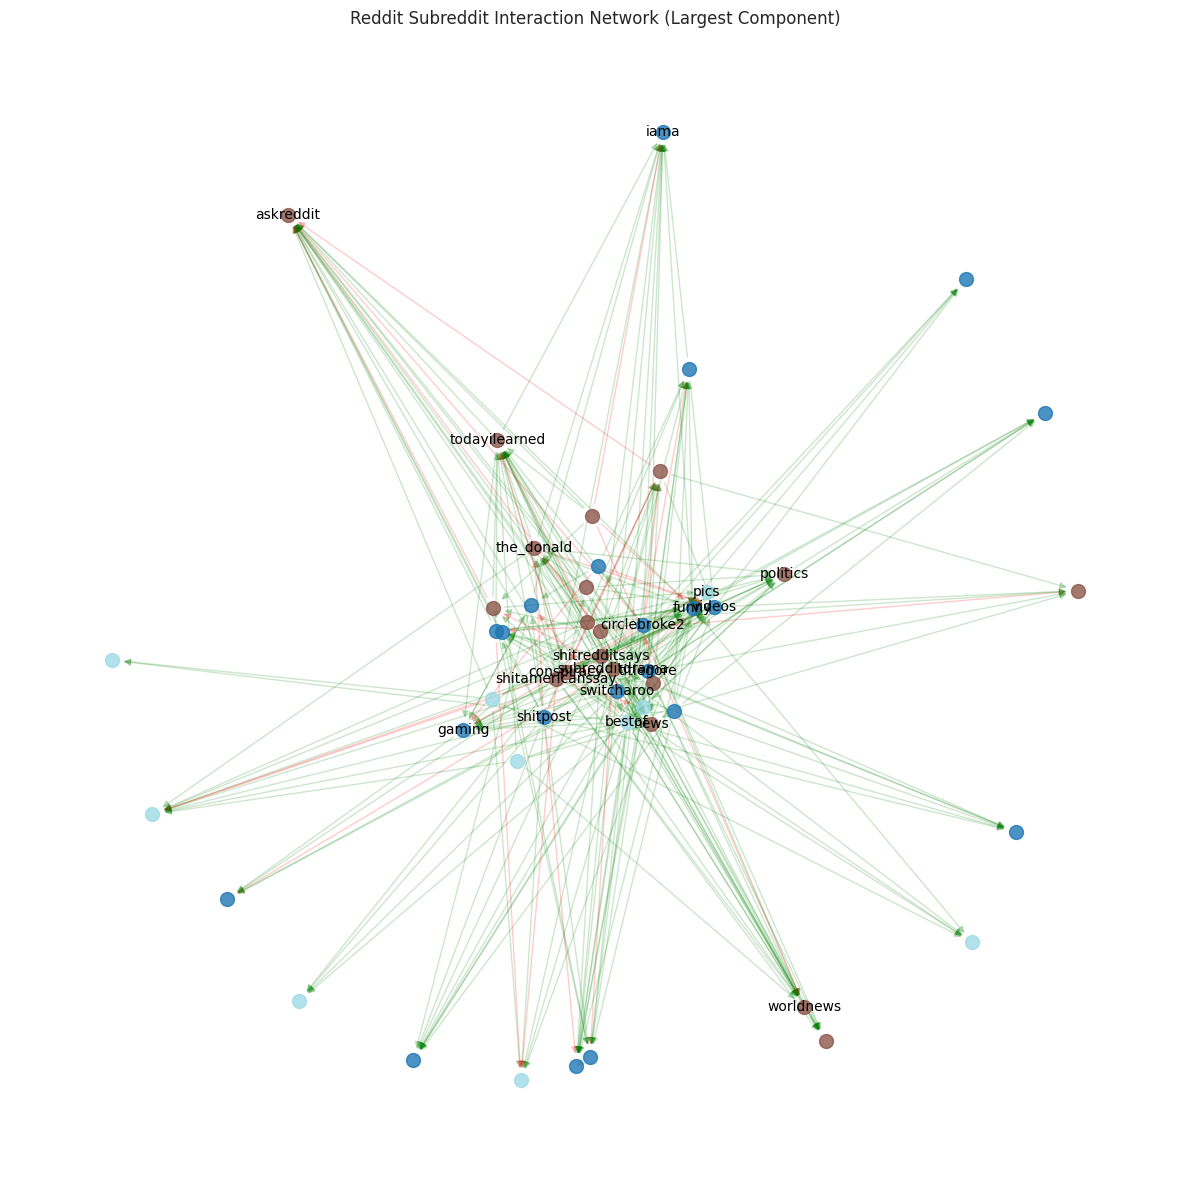

In [4]:
# Create a network visualization of the Reddit dataset
if 'reddit_df' in locals() and 'node_mapping' in locals():
    import networkx as nx
    from networkx.algorithms import community
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes with names as attributes
    for subreddit, idx in node_mapping.items():
        G.add_node(idx, name=subreddit)
    
    # Sample edges for visualization (using too many edges makes the visualization cluttered)
    # We'll focus on the most active subreddits
    
    # Get top 50 most active subreddits
    if 'subreddit_counts' in locals():
        top_subreddits = set(subreddit_counts.head(50)['subreddit'])
    else:
        source_counts = reddit_df['SOURCE_SUBREDDIT'].value_counts().reset_index()
        source_counts.columns = ['subreddit', 'count']
        top_subreddits = set(source_counts.head(50)['subreddit'])
    
    # Filter edges between top subreddits
    edge_list = []
    for _, row in reddit_df.iterrows():
        if row['SOURCE_SUBREDDIT'] in top_subreddits and row['TARGET_SUBREDDIT'] in top_subreddits:
            src_idx = node_mapping[row['SOURCE_SUBREDDIT']]
            dst_idx = node_mapping[row['TARGET_SUBREDDIT']]
            sentiment = row['LINK_SENTIMENT']
            edge_list.append((src_idx, dst_idx, {'weight': 1, 'sentiment': sentiment}))
    
    # Add a sample of edges to the graph
    max_edges = 500  # Limit number of edges for visualization
    if len(edge_list) > max_edges:
        import random
        random.seed(42)
        edge_list = random.sample(edge_list, max_edges)
    
    G.add_edges_from(edge_list)
    
    print(f"Created graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    
    # Compute basic network metrics
    print("\nNetwork metrics:")
    print(f"- Number of connected components: {nx.number_weakly_connected_components(G)}")
    
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    print(f"- Size of largest connected component: {len(largest_cc)} nodes")
    
    # Create subgraph of largest component for visualization
    G_cc = G.subgraph(largest_cc).copy()
    
    # Compute communities for the largest component
    try:
        communities = community.greedy_modularity_communities(G_cc.to_undirected())
        print(f"- Number of communities detected: {len(communities)}")
        
        # Create a dictionary mapping node to community
        community_map = {}
        for i, comm in enumerate(communities):
            for node in comm:
                community_map[node] = i
                
        # Set community as node attribute
        nx.set_node_attributes(G_cc, community_map, 'community')
    except:
        print("- Could not compute communities due to graph structure")
    
    # Visualize the network
    plt.figure(figsize=(12, 12))
    
    # Layout for graph
    pos = nx.spring_layout(G_cc, seed=42, iterations=100)
    
    # Draw nodes, colored by community if available
    if 'community_map' in locals():
        # Get unique communities
        communities = set(community_map.values())
        colormap = plt.cm.tab20(np.linspace(0, 1, len(communities)))
        
        # Draw nodes by community
        for comm_idx, color in zip(communities, colormap):
            nodelist = [node for node, comm in community_map.items() if comm == comm_idx]
            nx.draw_networkx_nodes(G_cc, pos, 
                                   nodelist=nodelist,
                                   node_color=[color],
                                   node_size=100,
                                   alpha=0.8)
    else:
        nx.draw_networkx_nodes(G_cc, pos, node_size=100, alpha=0.8)
    
    # Draw edges, colored by sentiment
    edge_colors = []
    for u, v, data in G_cc.edges(data=True):
        if data.get('sentiment', 0) > 0:
            edge_colors.append('green')  # Positive sentiment
        else:
            edge_colors.append('red')    # Negative sentiment
    
    nx.draw_networkx_edges(G_cc, pos, alpha=0.2, arrows=True, edge_color=edge_colors)
    
    # Add labels for some nodes (not all to avoid clutter)
    # Get top 20 nodes by degree
    top_nodes = sorted(G_cc.degree, key=lambda x: x[1], reverse=True)[:20]
    labels = {node: G_cc.nodes[node].get('name', str(node)) for node, _ in top_nodes}
    nx.draw_networkx_labels(G_cc, pos, labels, font_size=10)
    
    plt.title("Reddit Subreddit Interaction Network (Largest Component)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Reddit dataset or node mapping not available for network visualization.")

Preparing data for TGN model...
Split dataset into 400348 train, 85789 validation, and 85790 test edges
Data preparation complete. Ready for TGN model training.
Creating network visualization...


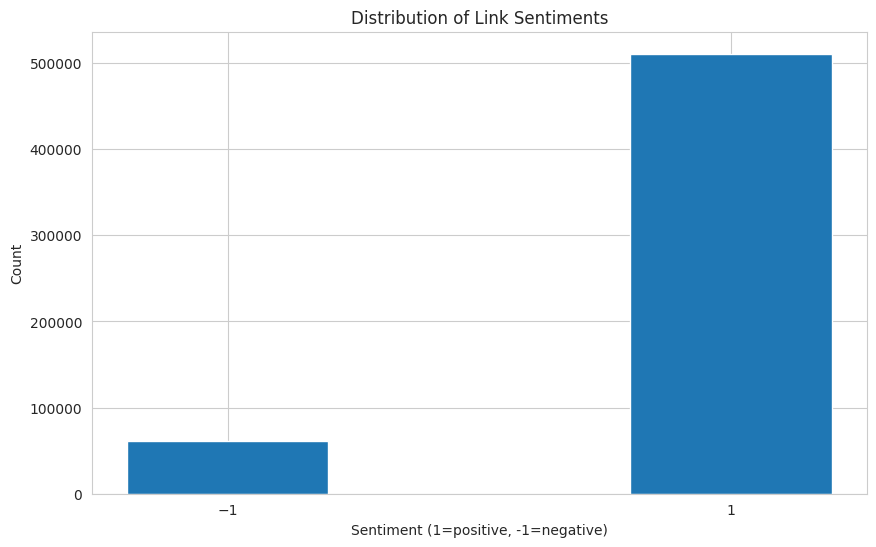

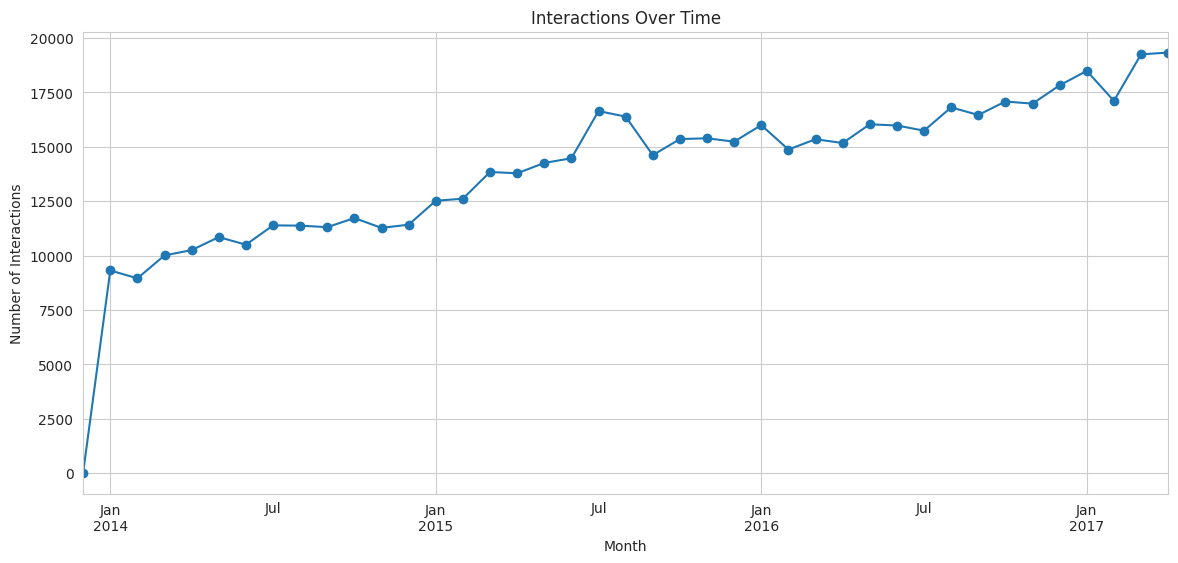

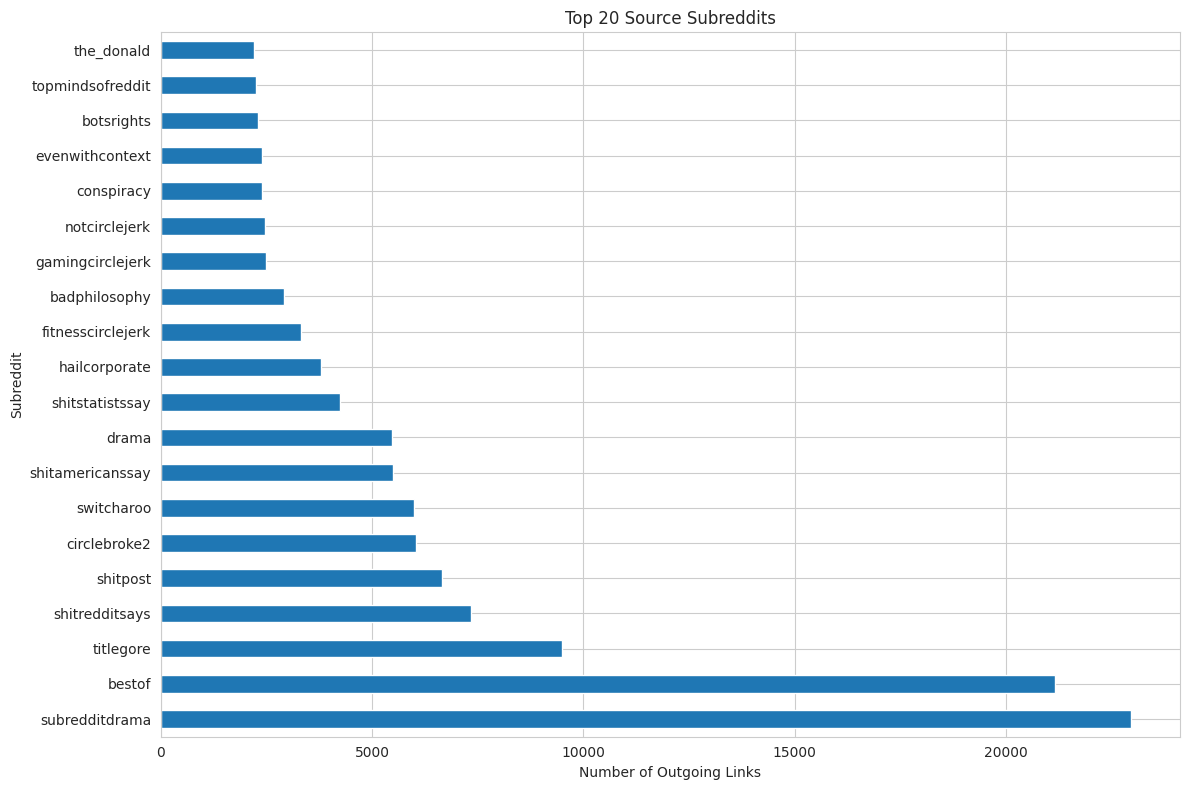

Error in network visualization: name 'has_cugraph' is not defined
Dataset visualization complete!


In [5]:
# Prepare and save the Reddit dataset for TGN model
if 'processed_reddit_df' in locals() and 'node_mapping' in locals():
    # Create TGN-ready dataset
    print("Preparing data for TGN model...")
    
    # 1. Convert subreddit names to indices
    processed_reddit_df['src_idx'] = processed_reddit_df['SOURCE_SUBREDDIT'].map(node_mapping)
    processed_reddit_df['dst_idx'] = processed_reddit_df['TARGET_SUBREDDIT'].map(node_mapping)
    
    # 2. Extract features from PROPERTIES
    # Define a function to extract features from the PROPERTIES string
    def extract_edge_features(properties_str, num_features=10):
        try:
            values = properties_str.split(',')[:num_features]
            return [float(v) if v.replace('.', '', 1).isdigit() else 0.0 for v in values]
        except:
            return [0.0] * num_features
    
    # Extract features for each edge
    edge_features = np.array([extract_edge_features(prop) for prop in processed_reddit_df['PROPERTIES']])
    
    # Fill NaN values with 0
    edge_features = np.nan_to_num(edge_features)
    
    # 3. Create node features (we'll use node embeddings initialized randomly)
    # In a real scenario, you might want to use actual node features if available
    num_nodes = len(node_mapping)
    node_feat_dim = 50  # Same dimension as in the model configuration
    np.random.seed(42)  # For reproducibility
    node_features = np.random.randn(num_nodes, node_feat_dim)
    
    # 4. Split into train/validation/test sets
    # TGN uses temporal splits rather than random splits
    # We'll use the first 70% for training, next 15% for validation, and last 15% for testing
    num_edges = len(processed_reddit_df)
    train_end = int(0.7 * num_edges)
    val_end = int(0.85 * num_edges)
    
    train_df = processed_reddit_df.iloc[:train_end]
    val_df = processed_reddit_df.iloc[train_end:val_end]
    test_df = processed_reddit_df.iloc[val_end:]
    
    print(f"Split dataset into {len(train_df)} train, {len(val_df)} validation, and {len(test_df)} test edges")
    
    # 5. Create and save TGN-ready data dictionary
    tgn_data = {
        'num_nodes': num_nodes,
        'node_features': node_features,
        'edge_features': edge_features,
        'train_df': train_df,
        'val_df': val_df,
        'test_df': test_df,
        'node_mapping': node_mapping
    }
    
    # This data will be used in the TGN model
    print("Data preparation complete. Ready for TGN model training.")
else:
    print("Processed Reddit dataset or node mapping not available.")

# Visualize the Reddit dataset with GPU acceleration if available
if 'reddit_df' in locals():
    print("Creating network visualization...")
    
    # 1. Distribution of sentiments
    plt.figure(figsize=(10, 6))
    sentiment_counts = reddit_df['LINK_SENTIMENT'].value_counts()
    plt.bar(sentiment_counts.index, sentiment_counts.values)
    plt.title('Distribution of Link Sentiments')
    plt.xlabel('Sentiment (1=positive, -1=negative)')
    plt.ylabel('Count')
    plt.xticks([-1, 1])
    plt.show()
    
    # 2. Temporal distribution of interactions
    plt.figure(figsize=(14, 6))
    reddit_df['TIMESTAMP'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Interactions Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Interactions')
    plt.grid(True)
    plt.show()
    
    # 3. Top subreddits by activity
    plt.figure(figsize=(12, 8))
    source_counts = reddit_df['SOURCE_SUBREDDIT'].value_counts().head(20)
    source_counts.plot(kind='barh')
    plt.title('Top 20 Source Subreddits')
    plt.xlabel('Number of Outgoing Links')
    plt.ylabel('Subreddit')
    plt.tight_layout()
    plt.show()
    
    # 4. Network visualization with GPU acceleration if available
    try:
        # Get top 30 most active subreddits for visualization
        top_source = set(reddit_df['SOURCE_SUBREDDIT'].value_counts().head(30).index)
        top_target = set(reddit_df['TARGET_SUBREDDIT'].value_counts().head(30).index)
        top_subreddits = top_source.union(top_target)
        
        # Filter edges for visualization
        vis_edges_df = reddit_df[reddit_df['SOURCE_SUBREDDIT'].isin(top_subreddits) & 
                           reddit_df['TARGET_SUBREDDIT'].isin(top_subreddits)].head(500).copy()
        
        # Map subreddit names to indices
        vis_edges_df['src_idx'] = vis_edges_df['SOURCE_SUBREDDIT'].map(node_mapping)
        vis_edges_df['dst_idx'] = vis_edges_df['TARGET_SUBREDDIT'].map(node_mapping)
        
        if has_cugraph:
            print("Using GPU-accelerated graph visualization with cuGraph")
            # Convert to cuDF DataFrame for GPU processing
            try:
                # Create cuDF DataFrame with edge list
                cu_edges = cudf.DataFrame({
                    'src': vis_edges_df['src_idx'],
                    'dst': vis_edges_df['dst_idx'],
                    'sentiment': vis_edges_df['LINK_SENTIMENT']
                })
                
                # Create cuGraph graph
                G = cugraph.Graph(directed=True)
                G.from_cudf_edgelist(cu_edges, source='src', destination='dst', edge_attr='sentiment')
                
                # Use cuGraph's layout algorithm for node positions (faster than NetworkX)
                pos = cugraph.layout.force_atlas2(G, max_iter=500)
                pos_df = pos.to_pandas()
                
                # Convert back to NetworkX for visualization
                # (cuGraph doesn't have built-in plotting yet)
                G_nx = nx.DiGraph()
                
                # Add nodes with names
                for subreddit, idx in node_mapping.items():
                    if idx in pos_df.index:
                        G_nx.add_node(idx, name=subreddit)
                
                # Add edges with sentiment
                for _, row in vis_edges_df.iterrows():
                    src, dst = row['src_idx'], row['dst_idx']
                    sentiment = row['LINK_SENTIMENT']
                    G_nx.add_edge(src, dst, sentiment=sentiment)
                
                # Convert cuGraph positions to dict format for NetworkX
                pos_dict = {idx: (pos_df.loc[idx, 'x'], pos_df.loc[idx, 'y']) 
                           for idx in pos_df.index if idx in G_nx.nodes()}
                
                # Create visualization
                plt.figure(figsize=(12, 12))
                
                # Draw nodes
                nx.draw_networkx_nodes(G_nx, pos_dict, node_size=100, alpha=0.8)
                
                # Draw edges colored by sentiment
                edge_colors = ['green' if G_nx[u][v]['sentiment'] > 0 else 'red' 
                              for u, v in G_nx.edges()]
                nx.draw_networkx_edges(G_nx, pos_dict, edge_color=edge_colors, 
                                      alpha=0.4, arrows=True)
                
                # Add labels for some nodes
                labels = {node: G_nx.nodes[node]['name'] 
                         for node in list(G_nx.nodes())[:20]}  # Top 20 nodes
                nx.draw_networkx_labels(G_nx, pos_dict, labels, font_size=8)
                
                plt.title('Reddit Subreddit Network (GPU-accelerated layout)')
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"Error with cuGraph visualization: {e}, falling back to NetworkX")
                has_cugraph = False  # Fall back to NetworkX
        
        if not has_cugraph:  # Use NetworkX if cuGraph is not available or failed
            print("Using CPU-based NetworkX for graph visualization")
            # Create a directed graph
            G = nx.DiGraph()
            
            # Add nodes with names
            for subreddit, idx in node_mapping.items():
                if subreddit in top_subreddits:
                    G.add_node(idx, name=subreddit)
            
            # Add edges with sentiment
            for _, row in vis_edges_df.iterrows():
                src, dst = row['src_idx'], row['dst_idx']
                sentiment = row['LINK_SENTIMENT']
                G.add_edge(src, dst, sentiment=sentiment)
            
            # Create visualization with optimized layout
            plt.figure(figsize=(12, 12))
            pos = nx.spring_layout(G, seed=42, iterations=100, k=0.3)
            
            # Draw nodes
            nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
            
            # Draw edges colored by sentiment
            edge_colors = ['green' if G[u][v]['sentiment'] > 0 else 'red' for u, v in G.edges()]
            nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.4, arrows=True)
            
            # Add labels for some nodes
            labels = {node: G.nodes[node]['name'] for node in list(G.nodes())[:20]}  # Top 20 nodes
            nx.draw_networkx_labels(G, pos, labels, font_size=8)
            
            plt.title('Reddit Subreddit Network (CPU-based layout)')
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"Error in network visualization: {e}")
    
    print("Dataset visualization complete!")
else:
    print("Reddit dataset not loaded. Cannot visualize data.")

# Enhanced Temporal Graph Network (TGN) Implementation

This notebook demonstrates the implementation of a more accurate Temporal Graph Network (TGN) model based on the Twitter Research paper: [Temporal Graph Networks for Deep Learning on Dynamic Graphs](https://arxiv.org/abs/2006.10637).

The implementation includes:
- Memory module with proper message passing
- Message function with multiple options
- Memory updater with temporal information
- Aggregator for temporal messages
- Temporal attention mechanism
- Decay-based temporal attention support

In [6]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import warnings
import time

# Add the src directory to the system path if it's not already there
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Import the TemporalGraphNetwork from the enhanced_tgn module
from enhanced_tgn import TemporalGraphNetwork

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Import our custom GPU graph utilities
try:
    from gpu_graph_utils import accelerated_graph_layout, gpu_accelerated_community_detection, visualize_graph_with_gpu_acceleration
    has_gpu_graph_utils = True
    print("GPU-accelerated graph utilities available for visualization")
except ImportError:
    has_gpu_graph_utils = False
    print("GPU graph utils not found, will use traditional methods")

# Try to import cuGraph for GPU-accelerated graph processing
try:
    import cugraph
    import cudf
    # Try importing cupy for better GPU memory management
    try:
        import cupy as cp
        has_cupy = True
        print("CuPy available for GPU array operations")
    except ImportError:
        has_cupy = False
        print("CuPy not available")
    has_cugraph = True
    print("GPU-accelerated graph processing available with RAPIDS cuGraph")
except ImportError:
    has_cugraph = False
    print("RAPIDS cuGraph not available, falling back to PyTorch-based GPU acceleration or CPU-based NetworkX")
    import networkx as nx

# Verify imports worked correctly
print(f"PyTorch version: {torch.__version__}")
print(f"Successfully imported TemporalGraphNetwork class from enhanced_tgn module")

Using device: cuda
GPU graph utils not found, will use traditional methods
RAPIDS cuGraph not available, falling back to PyTorch-based GPU acceleration or CPU-based NetworkX
PyTorch version: 2.7.0+cu128
Successfully imported TemporalGraphNetwork class from enhanced_tgn module


## 1. Model Configuration

Setting up the parameters for the TGN model to match those in the paper.

In [7]:
# Model configuration
# Get the number of nodes from the node_mapping dictionary if it exists
if 'node_mapping' in locals():
    num_nodes = len(node_mapping)
else:
    # If not available, use the value from tgn_data if available
    if 'tgn_data' in locals() and 'num_nodes' in tgn_data:
        num_nodes = tgn_data['num_nodes']
    else:
        # Default fallback value
        num_nodes = 54075  # Known number of unique subreddits from previous analysis

node_feat_dim = 50   # Dimension of node features
edge_feat_dim = 10   # Dimension of edge features

# Additional model configuration (using parameters defined in data processing cell)
if 'num_nodes' in locals() and 'node_feat_dim' in locals() and 'edge_feat_dim' in locals():
    # These parameters are already defined in the data processing cell
    # num_nodes = set from the actual data
    # node_feat_dim = 50
    # edge_feat_dim = 10
    
    # Additional model parameters
    memory_dim = 100     # Dimension of node memory
    time_dim = 10        # Dimension of time encoding
    embedding_dim = 100  # Dimension of final node embeddings
    message_dim = 100    # Dimension of messages
    n_layers = 2         # Number of graph attention layers
    n_heads = 2          # Number of attention heads
    dropout = 0.1        # Dropout probability
    
    print(f"Configuration set: {n_layers} layers, {n_heads} attention heads, {node_feat_dim}-dim node features, {edge_feat_dim}-dim edge features")
    print(f"Using {num_nodes} nodes from the dataset")
else:
    print("Data processing needs to be completed first to set model configuration parameters.")

Configuration set: 2 layers, 2 attention heads, 50-dim node features, 10-dim edge features
Using 54075 nodes from the dataset


## 2. Data Preparation

Loading and preprocessing a dynamic graph dataset to use with the TGN model. We'll use the Reddit dataset.

In [8]:
# Helper functions for data preparation
def load_reddit_dataset(verbose=True):
    """Load and perform basic exploration of the Reddit dataset"""
    try:
        # Check multiple possible locations for the dataset
        possible_data_dirs = [
            os.path.join(os.getcwd(), 'data'),  # Current directory
            os.path.join(os.path.dirname(os.getcwd()), 'data'),  # Parent directory
            'data',  # Relative path
            os.path.join(project_root, 'data') if 'project_root' in locals() else None  # Project root if defined
        ]
        
        # Filter out None values
        possible_data_dirs = [d for d in possible_data_dirs if d is not None]
        
        if verbose:
            print(f"Checking the following paths for dataset:")
            for path in possible_data_dirs:
                print(f"  - {path}")
        
        # Try to find dataset in each possible location
        datasets = {}
        dataset_found = False
        
        for data_dir in possible_data_dirs:
            title_path = os.path.join(data_dir, 'soc-redditHyperlinks-title.tsv')
            body_path = os.path.join(data_dir, 'soc-redditHyperlinks-body.tsv')
            tgat_path = os.path.join(data_dir, 'reddit_TGAT.csv')
            
            if os.path.exists(title_path):
                title_df = pd.read_csv(title_path, sep='\t')
                datasets['title'] = title_df
                if verbose:
                    print(f"Found Reddit title hyperlinks dataset at {title_path} with {len(title_df)} edges")
                dataset_found = True
            
            if os.path.exists(body_path):
                body_df = pd.read_csv(body_path, sep='\t')
                datasets['body'] = body_df
                if verbose:
                    print(f"Found Reddit body hyperlinks dataset at {body_path} with {len(body_df)} edges")
                dataset_found = True
                
            if os.path.exists(tgat_path):
                tgat_df = pd.read_csv(tgat_path)
                datasets['tgat'] = tgat_df
                if verbose:
                    print(f"Found Reddit TGAT dataset at {tgat_path} with {len(tgat_df)} edges")
                dataset_found = True
            
            # If dataset was found in this directory, no need to check others
            if dataset_found:
                break
        
        # If no datasets were found, raise an error
        if not datasets:
            raise FileNotFoundError("No Reddit dataset files found in any of the checked directories")
            
        # Return all loaded datasets
        return datasets
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        # Print current working directory for debugging
        print(f"Current working directory: {os.getcwd()}")
        return None

# Load the dataset
reddit_datasets = load_reddit_dataset()

# Choose the title dataset for our analysis
if reddit_datasets is not None and 'title' in reddit_datasets:
    reddit_df = reddit_datasets['title']
    print("\nFirst few rows of the Reddit title hyperlinks dataset:")
    display(reddit_df.head())
    
    # Display dataset information
    print("\nDataset information:")
    print(f"Shape: {reddit_df.shape}")
    print(f"Columns: {reddit_df.columns.tolist()}")
    
    # Check for missing values
    print("\nMissing values:")
    print(reddit_df.isnull().sum())
    
    # Display data types
    print("\nData types:")
    print(reddit_df.dtypes)
else:
    print("Reddit title dataset not found. Please check that the data files exist in one of the searched directories.")

Checking the following paths for dataset:
  - /home/strix/Workspace/Projects/CommunityDetection/notebooks/data
  - /home/strix/Workspace/Projects/CommunityDetection/data
  - data
Found Reddit title hyperlinks dataset at /home/strix/Workspace/Projects/CommunityDetection/data/soc-redditHyperlinks-title.tsv with 571927 edges
Found Reddit body hyperlinks dataset at /home/strix/Workspace/Projects/CommunityDetection/data/soc-redditHyperlinks-body.tsv with 286561 edges
Found Reddit TGAT dataset at /home/strix/Workspace/Projects/CommunityDetection/data/reddit_TGAT.csv with 672447 edges

First few rows of the Reddit title hyperlinks dataset:


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."



Dataset information:
Shape: (571927, 6)
Columns: ['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES']

Missing values:
SOURCE_SUBREDDIT    0
TARGET_SUBREDDIT    0
POST_ID             0
TIMESTAMP           0
LINK_SENTIMENT      0
PROPERTIES          0
dtype: int64

Data types:
SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object


## 3. Model Training

Training the TGN model on the temporal graph data.

In [ ]:
# Import required packages
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import warnings
import numpy as np

def get_device():
    """Safely determine the best available device"""
    if torch.cuda.is_available():
        try:
            device = torch.device('cuda')
            print(f"CUDA available: {torch.cuda.get_device_name()}")
            print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory // 1024**3} GB")
            
            # Test CUDA functionality with a simple operation
            test_tensor = torch.randn(10, 10, device=device)
            test_result = test_tensor @ test_tensor.T
            del test_tensor, test_result
            torch.cuda.empty_cache()
            
            print("CUDA test passed successfully")
            return device
        except Exception as e:
            print(f"CUDA test failed: {e}")
            print("Falling back to CPU")
            return torch.device('cpu')
    else:
        print("CUDA not available, using CPU")
        return torch.device('cpu')

def safe_to_device(tensor, device, name="tensor"):
    """Safely move tensor to device with error handling"""
    try:
        if not isinstance(tensor, torch.Tensor):
            tensor = torch.as_tensor(tensor, dtype=torch.float32)
        
        # Check if tensor is already on the correct device
        if tensor.device == device:
            return tensor
        
        # Validate tensor before moving
        if torch.isnan(tensor).any() or torch.isinf(tensor).any():
            print(f"Warning: {name} contains NaN or Inf values, replacing with zeros")
            tensor = torch.where(torch.isnan(tensor) | torch.isinf(tensor), 
                               torch.zeros_like(tensor), tensor)
        
        # For integer tensors (indices), ensure they're in valid range
        if tensor.dtype in [torch.int32, torch.int64, torch.long]:
            if name in ['src_idx', 'dst_idx'] or 'idx' in name:
                # Clamp indices to reasonable range
                max_nodes = getattr(safe_to_device, '_max_nodes', 1000)
                tensor = torch.clamp(tensor, 0, max_nodes - 1)
            
        return tensor.to(device, non_blocking=True)
    except Exception as e:
        print(f"Error moving {name} to {device}: {e}")
        # More robust fallback
        try:
            if hasattr(tensor, 'cpu'):
                cpu_tensor = tensor.cpu()
                if cpu_tensor.dtype in [torch.int32, torch.int64, torch.long]:
                    # For index tensors, ensure valid range
                    max_nodes = getattr(safe_to_device, '_max_nodes', 1000)
                    cpu_tensor = torch.clamp(cpu_tensor, 0, max_nodes - 1)
                return torch.as_tensor(cpu_tensor.numpy(), device=device, dtype=cpu_tensor.dtype)
            else:
                return torch.as_tensor(tensor, device=device, dtype=torch.float32)
        except Exception as e2:
            print(f"Fallback also failed for {name}: {e2}")
            # Last resort: return zero tensor
            return torch.zeros(1, device=device, dtype=torch.float32)

class DeviceSafeDataLoader:
    """Wrapper for DataLoader that handles device placement safely"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
    
    def __iter__(self):
        for batch in self.dataloader:
            try:
                # Move batch to device safely
                safe_batch = {}
                for key, value in batch.items():
                    if isinstance(value, torch.Tensor):
                        safe_batch[key] = safe_to_device(value, self.device, f"batch_{key}")
                    else:
                        safe_batch[key] = value
                yield safe_batch
            except Exception as e:
                print(f"Error processing batch: {e}")
                continue
    
    def __len__(self):
        return len(self.dataloader)

def train_tgn_model(model, train_loader, val_loader, node_features, epochs=5, learning_rate=0.0001, device=None):
    """
    Train the TGN model with robust device handling
    """
    # Device setup
    if device is None:
        device = get_device()
    
    print(f"Training on device: {device}")
    
    # Move model to device with comprehensive testing
    try:
        print("Moving model to device...")
        model = model.to(device)
        
        # Test model with dummy data to catch issues early
        print("Testing model with dummy data...")
        dummy_src = torch.randint(0, min(10, model.num_nodes), (2,), device=device)
        dummy_dst = torch.randint(0, min(10, model.num_nodes), (2,), device=device)
        dummy_timestamps = torch.randn(2, device=device)
        dummy_src_features = torch.randn(2, node_features.size(1), device=device)
        dummy_dst_features = torch.randn(2, node_features.size(1), device=device)
        dummy_edge_features = torch.randn(2, model.edge_feat_dim, device=device)        
        with torch.no_grad():
            try:
                test_output = model(
                    src_ids=dummy_src,
                    dst_ids=dummy_dst,
                    src_features=dummy_src_features,
                    dst_features=dummy_dst_features,
                    timestamps=dummy_timestamps,
                    edge_features=dummy_edge_features
                )
                print("Model test passed successfully")
                del dummy_src, dummy_dst, dummy_timestamps, dummy_src_features, dummy_dst_features, dummy_edge_features, test_output
            except Exception as model_test_error:
                print(f"Model test failed: {model_test_error}")
                print("This indicates an issue with the model architecture or parameters")
                return None, None
                
        torch.cuda.empty_cache()
        print("Model successfully moved to device and tested")
    except Exception as e:
        print(f"Error moving model to device: {e}")
        print("Attempting to use CPU instead...")
        device = torch.device('cpu')
        try:
            model = model.to(device)
            print("Successfully fell back to CPU")
        except Exception as cpu_error:
            print(f"CPU fallback also failed: {cpu_error}")
            return None, None
    
    # Handle node features with device safety and validation
    print("Preparing node features...")
    try:
        # Store max nodes for index validation
        safe_to_device._max_nodes = node_features.shape[0] if hasattr(node_features, 'shape') else len(node_features)
        
        # Validate node_features before moving to device
        if hasattr(node_features, 'shape'):
            print(f"Node features shape: {node_features.shape}")
            if len(node_features.shape) != 2:
                print(f"Warning: Expected 2D node features, got {len(node_features.shape)}D")
        
        node_features = safe_to_device(node_features, device, "node_features")
        
        # Additional validation after device transfer
        if torch.isnan(node_features).any():
            print("Warning: node_features contains NaN values, replacing with small random values")
            node_features = torch.where(torch.isnan(node_features), 
                                      torch.randn_like(node_features) * 0.01, node_features)
        
        print(f"Node features ready: shape {node_features.shape}, device {node_features.device}")
        print(f"Node features range: [{node_features.min().item():.4f}, {node_features.max().item():.4f}]")
        
    except Exception as e:
        print(f"Error preparing node features: {e}")
        return None, None
    
    # Wrap data loaders for safe device handling
    safe_train_loader = DeviceSafeDataLoader(train_loader, device)
    safe_val_loader = DeviceSafeDataLoader(val_loader, device)
    
    # Optimizer with gradient clipping
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)
    
    # Loss function
    loss_fn = nn.BCEWithLogitsLoss()
    
    # Training metrics
    train_losses = []
    val_losses = []
    
    # Memory management settings
    if device.type == 'cuda':
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False
    
    for epoch in range(epochs):
        print(f"\n=== Epoch {epoch+1}/{epochs} ===")
        
        # Training phase
        model.train()
        total_loss = 0
        num_batches = 0
        successful_batches = 0
        
        # Reset memory at the start of each epoch
        try:
            model.reset_memory()
        except AttributeError:
            pass  # Model might not have reset_memory method
        
        # Clear GPU cache at start of epoch
        if device.type == 'cuda':
            torch.cuda.empty_cache()
            gc.collect()
        
        # Training loop with progress bar
        pbar = tqdm(safe_train_loader, desc=f"Training Epoch {epoch+1}")
        for batch_idx, batch in enumerate(pbar):
            try:
                # Verify batch integrity
                if not batch or len(batch) == 0:
                    continue
                
                # Extract batch data - handle potential shape issues
                src_idx = batch['src_idx'].squeeze()
                dst_idx = batch['dst_idx'].squeeze()
                timestamp = batch['timestamp'].squeeze()
                edge_features = batch['edge_features']
                pos_label = batch['label'].float()
                
                # Ensure tensors are 1D for indexing
                if src_idx.dim() == 0:
                    src_idx = src_idx.unsqueeze(0)
                if dst_idx.dim() == 0:
                    dst_idx = dst_idx.unsqueeze(0)
                if timestamp.dim() == 0:
                    timestamp = timestamp.unsqueeze(0)
                
                batch_size = src_idx.size(0)
                
                # Generate negative samples safely
                with torch.no_grad():
                    # Ensure we have valid node range
                    max_node_id = min(model.num_nodes - 1, node_features.size(0) - 1)
                    if max_node_id <= 0:
                        print("Error: Invalid node range")
                        continue
                        
                    neg_dst_idx = torch.randint(0, max_node_id + 1, (batch_size,), 
                                              device=device, dtype=src_idx.dtype)
                    
                    # Ensure negative samples are different from positive ones
                    for i in range(batch_size):
                        attempts = 0
                        while neg_dst_idx[i] == dst_idx[i] and attempts < 10:
                            neg_dst_idx[i] = torch.randint(0, max_node_id + 1, (1,), 
                                                         device=device, dtype=src_idx.dtype)
                            attempts += 1
                
                neg_label = torch.zeros_like(pos_label, device=device)
                
                # Index node features safely with additional bounds checking
                try:
                    # Double-check all indices are within valid bounds
                    max_valid_idx = node_features.size(0) - 1
                    
                    src_idx_clamped = torch.clamp(src_idx, 0, max_valid_idx)
                    dst_idx_clamped = torch.clamp(dst_idx, 0, max_valid_idx)
                    neg_dst_idx_clamped = torch.clamp(neg_dst_idx, 0, max_valid_idx)
                    
                    # Verify indices are actually valid
                    if (src_idx_clamped >= node_features.size(0)).any() or (src_idx_clamped < 0).any():
                        print(f"Invalid src indices detected in batch {batch_idx}")
                        continue
                    if (dst_idx_clamped >= node_features.size(0)).any() or (dst_idx_clamped < 0).any():
                        print(f"Invalid dst indices detected in batch {batch_idx}")
                        continue
                    if (neg_dst_idx_clamped >= node_features.size(0)).any() or (neg_dst_idx_clamped < 0).any():
                        print(f"Invalid neg_dst indices detected in batch {batch_idx}")
                        continue
                    
                    src_features = node_features[src_idx_clamped]
                    dst_features = node_features[dst_idx_clamped]
                    neg_dst_features = node_features[neg_dst_idx_clamped]
                    
                    # Validate extracted features
                    if torch.isnan(src_features).any() or torch.isnan(dst_features).any() or torch.isnan(neg_dst_features).any():
                        print(f"NaN features detected in batch {batch_idx}")
                        continue
                    
                except (IndexError, RuntimeError) as e:
                    print(f"Error indexing node features in batch {batch_idx}: {e}")
                    print(f"node_features shape: {node_features.shape}")
                    print(f"src_idx range: [{src_idx.min().item()}, {src_idx.max().item()}]")
                    print(f"dst_idx range: [{dst_idx.min().item()}, {dst_idx.max().item()}]")
                    continue
                
                # Forward pass with error handling
                try:
                    # Clear gradients
                    optimizer.zero_grad()
                    
                    # Positive samples forward pass
                    pos_prob, _, _ = model(
                        src_ids=src_idx_clamped,
                        dst_ids=dst_idx_clamped,
                        src_features=src_features,
                        dst_features=dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    # Negative samples forward pass
                    neg_prob, _, _ = model(
                        src_ids=src_idx_clamped,
                        dst_ids=neg_dst_idx_clamped,
                        src_features=src_features,
                        dst_features=neg_dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    # Compute loss
                    pos_loss = loss_fn(pos_prob.squeeze(), pos_label.squeeze())
                    neg_loss = loss_fn(neg_prob.squeeze(), neg_label.squeeze())
                    loss = pos_loss + neg_loss
                    
                    # Check for nan/inf
                    if torch.isnan(loss) or torch.isinf(loss):
                        print(f"Invalid loss in batch {batch_idx}: {loss.item()}")
                        continue
                    
                    # Backward pass
                    loss.backward()
                    
                    # Gradient clipping
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    
                    # Optimizer step
                    optimizer.step()
                    
                    # Detach memory if available
                    try:
                        model.detach_memory()
                    except AttributeError:
                        pass
                    
                    # Update metrics
                    total_loss += loss.item()
                    successful_batches += 1
                    
                    # Update progress bar
                    pbar.set_postfix({'Loss': f'{loss.item():.4f}', 
                                    'Avg_Loss': f'{total_loss/successful_batches:.4f}'})
                    
                except Exception as e:
                    print(f"Error in forward/backward pass for batch {batch_idx}: {e}")
                    continue
                
                # Memory management
                if device.type == 'cuda' and batch_idx % 50 == 0:
                    torch.cuda.empty_cache()
                
                num_batches += 1
                
            except Exception as e:
                print(f"Error processing batch {batch_idx}: {e}")
                continue
        
        # Compute average training loss
        avg_train_loss = total_loss / successful_batches if successful_batches > 0 else float('inf')
        train_losses.append(avg_train_loss)
        
        # Validation phase
        print(f"Running validation...")
        model.eval()
        val_loss = 0
        val_batches = 0
        successful_val_batches = 0
        
        # Reset memory for validation
        try:
            model.reset_memory()
        except AttributeError:
            pass
        
        with torch.no_grad():
            for batch_idx, batch in enumerate(tqdm(safe_val_loader, desc="Validation")):
                try:
                    # Process validation batch similar to training
                    src_idx = batch['src_idx'].squeeze()
                    dst_idx = batch['dst_idx'].squeeze()
                    timestamp = batch['timestamp'].squeeze()
                    edge_features = batch['edge_features']
                    pos_label = batch['label'].float()
                    
                    # Handle dimension issues
                    if src_idx.dim() == 0:
                        src_idx = src_idx.unsqueeze(0)
                    if dst_idx.dim() == 0:
                        dst_idx = dst_idx.unsqueeze(0)
                    if timestamp.dim() == 0:
                        timestamp = timestamp.unsqueeze(0)
                    
                    batch_size = src_idx.size(0)
                    
                    # Generate negative samples
                    neg_dst_idx = torch.randint(0, model.num_nodes, (batch_size,), 
                                              device=device, dtype=src_idx.dtype)
                    neg_label = torch.zeros_like(pos_label, device=device)
                    
                    # Index node features safely
                    src_idx_clamped = torch.clamp(src_idx, 0, node_features.size(0) - 1)
                    dst_idx_clamped = torch.clamp(dst_idx, 0, node_features.size(0) - 1)
                    neg_dst_idx_clamped = torch.clamp(neg_dst_idx, 0, node_features.size(0) - 1)
                    
                    src_features = node_features[src_idx_clamped]
                    dst_features = node_features[dst_idx_clamped]
                    neg_dst_features = node_features[neg_dst_idx_clamped]
                    
                    # Forward pass
                    pos_prob, _, _ = model(
                        src_ids=src_idx_clamped,
                        dst_ids=dst_idx_clamped,
                        src_features=src_features,
                        dst_features=dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    neg_prob, _, _ = model(
                        src_ids=src_idx_clamped,
                        dst_ids=neg_dst_idx_clamped,
                        src_features=src_features,
                        dst_features=neg_dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    # Compute validation loss
                    val_pos_loss = loss_fn(pos_prob.squeeze(), pos_label.squeeze())
                    val_neg_loss = loss_fn(neg_prob.squeeze(), neg_label.squeeze())
                    batch_val_loss = val_pos_loss + val_neg_loss
                    
                    if not (torch.isnan(batch_val_loss) or torch.isinf(batch_val_loss)):
                        val_loss += batch_val_loss.item()
                        successful_val_batches += 1
                    
                    # Detach memory
                    try:
                        model.detach_memory()
                    except AttributeError:
                        pass
                    
                    val_batches += 1
                    
                except Exception as e:
                    print(f"Error in validation batch {batch_idx}: {e}")
                    continue
        
        # Compute average validation loss
        avg_val_loss = val_loss / successful_val_batches if successful_val_batches > 0 else float('inf')
        val_losses.append(avg_val_loss)
        
        # Learning rate scheduling
        scheduler.step(avg_val_loss)
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
        print(f"Successful batches - Train: {successful_batches}/{num_batches}, Val: {successful_val_batches}/{val_batches}")
        
        # Memory cleanup at end of epoch
        if device.type == 'cuda':
            torch.cuda.empty_cache()
        gc.collect()
    
    return train_losses, val_losses

# Main training script with device handling
def main_training_script():
    """Main function to initialize and train TGN model"""
    
    # Enable debugging for CUDA errors
    import os
    os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
    
    # Check if required variables exist
    required_vars = ['train_loader', 'val_loader', 'num_nodes', 'node_features', 
                    'node_feat_dim', 'edge_feat_dim', 'train_dataset']
    
    missing_vars = [var for var in required_vars if var not in globals()]
    if missing_vars:
        print(f"Missing required variables: {missing_vars}")
        print("Please ensure data is loaded before running training.")
        return
    
    # Validate data integrity before starting
    print("Validating data integrity...")
    try:
        print(f"num_nodes: {num_nodes}")
        print(f"node_feat_dim: {node_feat_dim}")
        print(f"edge_feat_dim: {edge_feat_dim}")
        
        # Check node_features
        if hasattr(node_features, 'shape'):
            print(f"node_features shape: {node_features.shape}")
            if node_features.shape[0] != num_nodes:
                print(f"Warning: node_features has {node_features.shape[0]} rows but num_nodes is {num_nodes}")
            if node_features.shape[1] != node_feat_dim:
                print(f"Warning: node_features has {node_features.shape[1]} features but node_feat_dim is {node_feat_dim}")
        
        # Test a sample from train_loader
        print("Testing data loader...")
        sample_batch = next(iter(train_loader))
        print(f"Sample batch keys: {list(sample_batch.keys())}")
        for key, value in sample_batch.items():
            if hasattr(value, 'shape'):
                print(f"  {key}: {value.shape}, dtype: {value.dtype}")
                if 'idx' in key:
                    print(f"    range: [{value.min().item()}, {value.max().item()}]")
        
    except Exception as e:
        print(f"Data validation error: {e}")
        print("Continuing with training, but there may be issues...")
    
    # Get optimal device
    device = get_device()
    
    # Set model parameters with safer defaults
    memory_dim = 64  # Reduced from 100
    time_dim = 8     # Reduced from 10
    embedding_dim = 64  # Reduced from 100
    message_dim = 64    # Reduced from 100
    n_layers = 1        # Reduced from 2
    n_heads = 2
    dropout = 0.1
    
    # Initialize the TGN model
    try:
        print("Initializing TGN model...")
        model = TemporalGraphNetwork(
            num_nodes=num_nodes,
            node_feat_dim=node_feat_dim,
            edge_feat_dim=edge_feat_dim,
            memory_dim=memory_dim,
            time_dim=time_dim,
            embedding_dim=embedding_dim,
            message_dim=message_dim,
            n_layers=n_layers,
            n_heads=n_heads,
            dropout=dropout,
            use_memory=True,
            message_function='mlp',
            memory_updater='gru',
            aggregator='lstm'
        )
        
        print(f"TGN model initialized with {num_nodes} nodes")
        print(f"Node features: {node_feat_dim}, Edge features: {edge_feat_dim}")
        
        # Count parameters
        num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"Model has {num_params:,} trainable parameters")
        
    except Exception as e:
        print(f"Error initializing model: {e}")
        import traceback
        traceback.print_exc()
        return
    
    # Prepare training subset based on device capability
    if device.type == 'cuda':
        # Use smaller batches on GPU to avoid memory issues
        max_samples = min(5000, len(train_dataset))  # Reduced
        batch_size = 32  # Reduced from 64
    else:
        # Use less data on CPU
        max_samples = min(1000, len(train_dataset))
        batch_size = 16
    
    print(f"Using {max_samples} samples for training with batch size {batch_size}")
    
    # Create subset
    subset_indices = torch.arange(max_samples)
    subset_train_dataset = torch.utils.data.Subset(train_dataset, subset_indices)
    subset_train_loader = torch.utils.data.DataLoader(
        subset_train_dataset, 
        batch_size=batch_size, 
        shuffle=False,
        num_workers=0,  # Avoid multiprocessing issues
        pin_memory=False  # Disable pin_memory to avoid issues
    )
    
    print("Starting TGN model training...")
    
    try:
        train_losses, val_losses = train_tgn_model(
            model=model,
            train_loader=subset_train_loader,
            val_loader=val_loader,
            node_features=node_features,
            epochs=2,  # Reduced from 3
            learning_rate=0.001,  # Increased learning rate
            device=device
        )
        
        if train_losses and val_losses:
            # Plot training curves
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            plt.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
            plt.plot(val_losses, 'r-', label='Validation Loss', linewidth=2)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('TGN Training and Validation Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.subplot(1, 2, 2)
            plt.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
            plt.xlabel('Epoch')
            plt.ylabel('Training Loss')
            plt.title('Training Loss Detail')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print("TGN model training completed successfully!")
            print(f"Final Training Loss: {train_losses[-1]:.4f}")
            print(f"Final Validation Loss: {val_losses[-1]:.4f}")
        else:
            print("Training failed - no loss values returned")
            
    except Exception as e:
        print(f"Error during training: {e}")
        import traceback
        traceback.print_exc()
    
    finally:
        # Cleanup
        if device.type == 'cuda':
            torch.cuda.empty_cache()
        gc.collect()

# Run the training if this script is executed
if __name__ == "__main__" or 'train_loader' in locals():
    main_training_script()
else:
    print("Required data not loaded. Please load your dataset first.")
    print("Expected variables: train_loader, val_loader, num_nodes, node_features, node_feat_dim, edge_feat_dim, train_dataset")

Validating data integrity...
num_nodes: 54075
node_feat_dim: 50
edge_feat_dim: 10
node_features shape: (54075, 50)
Testing data loader...
Sample batch keys: ['src_idx', 'dst_idx', 'timestamp', 'edge_features', 'label']
  src_idx: torch.Size([64, 1]), dtype: torch.int64
    range: [0, 53]
  dst_idx: torch.Size([64, 1]), dtype: torch.int64
    range: [22, 43699]
  timestamp: torch.Size([64, 1]), dtype: torch.float32
  edge_features: torch.Size([64, 10]), dtype: torch.float32
  label: torch.Size([64, 1]), dtype: torch.float32
CUDA available: NVIDIA GeForce RTX 3080 Laptop GPU
CUDA memory: 7 GB
CUDA test passed successfully
Initializing TGN model...
TGN model initialized with 54075 nodes
Node features: 50, Edge features: 10
Model has 179,252 trainable parameters
Using 5000 samples for training with batch size 32
Starting TGN model training...
Training on device: cuda
Moving model to device...
Testing model with dummy data...
Error moving model to device: 'int' object is not callable
Attemp

Training Epoch 1:   1%|          | 1/157 [00:00<00:18,  8.63it/s]

Error in forward/backward pass for batch 0: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 1: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 2: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:   3%|▎         | 4/157 [00:00<00:08, 18.56it/s]

Error in forward/backward pass for batch 3: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 4: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 5: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:   4%|▍         | 7/157 [00:00<00:06, 21.44it/s]

Error in forward/backward pass for batch 6: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 7: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 8: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:   6%|▋         | 10/157 [00:00<00:06, 22.72it/s]

Error in forward/backward pass for batch 9: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 10: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 11: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:   8%|▊         | 13/157 [00:00<00:06, 23.76it/s]

Error in forward/backward pass for batch 12: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 13: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 14: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  10%|█         | 16/157 [00:00<00:05, 24.44it/s]

Error in forward/backward pass for batch 15: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 16: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 17: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  12%|█▏        | 19/157 [00:00<00:05, 24.50it/s]

Error in forward/backward pass for batch 18: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 19: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 20: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  14%|█▍        | 22/157 [00:00<00:05, 24.45it/s]

Error in forward/backward pass for batch 21: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 22: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  16%|█▌        | 25/157 [00:01<00:05, 24.81it/s]

Error in forward/backward pass for batch 23: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 24: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 25: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 26: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  18%|█▊        | 28/157 [00:01<00:05, 24.87it/s]

Error in forward/backward pass for batch 27: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 28: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  20%|█▉        | 31/157 [00:01<00:05, 24.74it/s]

Error in forward/backward pass for batch 29: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 30: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 31: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 32: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  22%|██▏       | 34/157 [00:01<00:04, 25.10it/s]

Error in forward/backward pass for batch 33: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  24%|██▎       | 37/157 [00:01<00:05, 23.54it/s]

Error in forward/backward pass for batch 34: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 35: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 36: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 37: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 38: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  27%|██▋       | 43/157 [00:01<00:04, 24.63it/s]

Error in forward/backward pass for batch 39: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 40: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 41: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 42: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 43: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 44: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  31%|███       | 49/157 [00:02<00:04, 24.82it/s]

Error in forward/backward pass for batch 45: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 46: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 47: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 48: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 49: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 50: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  35%|███▌      | 55/157 [00:02<00:03, 25.57it/s]

Error in forward/backward pass for batch 51: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 52: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 53: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 54: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 55: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 56: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  39%|███▉      | 61/157 [00:02<00:03, 25.49it/s]

Error in forward/backward pass for batch 57: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 58: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 59: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 60: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 61: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  43%|████▎     | 67/157 [00:02<00:03, 25.50it/s]

Error in forward/backward pass for batch 62: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 63: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 64: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 65: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 66: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 67: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  46%|████▋     | 73/157 [00:02<00:03, 25.30it/s]

Error in forward/backward pass for batch 68: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 69: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 70: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 71: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 72: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 73: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  50%|█████     | 79/157 [00:03<00:03, 25.10it/s]

Error in forward/backward pass for batch 74: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 75: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 76: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 77: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 78: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 79: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  54%|█████▍    | 85/157 [00:03<00:02, 25.46it/s]

Error in forward/backward pass for batch 80: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 81: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 82: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 83: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 84: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 85: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  58%|█████▊    | 91/157 [00:03<00:02, 25.91it/s]

Error in forward/backward pass for batch 86: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 87: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 88: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 89: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 90: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 91: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  62%|██████▏   | 97/157 [00:03<00:02, 26.44it/s]

Error in forward/backward pass for batch 92: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 93: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 94: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 95: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 96: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 97: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  66%|██████▌   | 103/157 [00:04<00:02, 26.03it/s]

Error in forward/backward pass for batch 98: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 99: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 100: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 101: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 102: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  68%|██████▊   | 106/157 [00:04<00:02, 24.70it/s]

Error in forward/backward pass for batch 103: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 104: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 105: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 106: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 107: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 108: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  73%|███████▎  | 114/157 [00:04<00:01, 27.92it/s]

Error in forward/backward pass for batch 109: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 110: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 111: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 112: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 113: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 114: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 115: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  76%|███████▋  | 120/157 [00:04<00:01, 28.75it/s]

Error in forward/backward pass for batch 116: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 117: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 118: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 119: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 120: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 121: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 122: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  82%|████████▏ | 128/157 [00:05<00:00, 29.52it/s]

Error in forward/backward pass for batch 123: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 124: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 125: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 126: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 127: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 128: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 129: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  86%|████████▌ | 135/157 [00:05<00:00, 29.72it/s]

Error in forward/backward pass for batch 130: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 131: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 132: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 133: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 134: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 135: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  90%|████████▉ | 141/157 [00:05<00:00, 28.20it/s]

Error in forward/backward pass for batch 136: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 137: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 138: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 139: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 140: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 141: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  94%|█████████▎| 147/157 [00:05<00:00, 27.66it/s]

Error in forward/backward pass for batch 142: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 143: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 144: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 145: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 146: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 147: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1:  97%|█████████▋| 153/157 [00:05<00:00, 27.39it/s]

Error in forward/backward pass for batch 148: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 149: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 150: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 151: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 152: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 153: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))


Training Epoch 1: 100%|██████████| 157/157 [00:06<00:00, 25.97it/s]


Error in forward/backward pass for batch 154: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 155: Target size (torch.Size([32, 1])) must be the same as input size (torch.Size([32]))
Error in forward/backward pass for batch 156: Target size (torch.Size([8, 1])) must be the same as input size (torch.Size([8]))
Running validation...


Validation:   0%|          | 2/1341 [00:00<01:08, 19.44it/s]

Error in validation batch 0: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 1: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   0%|          | 5/1341 [00:00<01:06, 20.24it/s]

Error in validation batch 2: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 3: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 4: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 5: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 6: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|          | 8/1341 [00:00<01:05, 20.33it/s]

Error in validation batch 7: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 8: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 9: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|          | 11/1341 [00:00<01:05, 20.23it/s]

Error in validation batch 10: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 11: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|          | 14/1341 [00:00<01:09, 19.22it/s]

Error in validation batch 12: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 13: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|          | 16/1341 [00:00<01:08, 19.24it/s]

Error in validation batch 14: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 15: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|▏         | 18/1341 [00:00<01:08, 19.32it/s]

Error in validation batch 16: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 17: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   1%|▏         | 20/1341 [00:01<01:08, 19.40it/s]

Error in validation batch 18: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 19: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   2%|▏         | 22/1341 [00:01<01:08, 19.39it/s]

Error in validation batch 20: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 21: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   2%|▏         | 24/1341 [00:01<01:07, 19.53it/s]

Error in validation batch 22: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 23: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   2%|▏         | 26/1341 [00:01<01:07, 19.61it/s]

Error in validation batch 24: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 25: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   2%|▏         | 29/1341 [00:01<01:05, 19.88it/s]

Error in validation batch 26: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 27: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 28: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 29: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 30: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   2%|▏         | 32/1341 [00:01<01:04, 20.27it/s]

Error in validation batch 31: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 32: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 33: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   3%|▎         | 35/1341 [00:01<01:04, 20.21it/s]

Error in validation batch 34: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 35: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   3%|▎         | 38/1341 [00:01<01:04, 20.30it/s]

Error in validation batch 36: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 37: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 38: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 39: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   3%|▎         | 41/1341 [00:02<01:06, 19.43it/s]

Error in validation batch 40: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 41: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 42: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   3%|▎         | 44/1341 [00:02<01:04, 19.98it/s]

Error in validation batch 43: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 44: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   4%|▎         | 47/1341 [00:02<01:04, 20.07it/s]

Error in validation batch 45: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 46: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 47: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   4%|▎         | 50/1341 [00:02<01:03, 20.45it/s]

Error in validation batch 48: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 49: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   4%|▍         | 53/1341 [00:02<01:02, 20.62it/s]

Error in validation batch 50: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 51: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 52: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 53: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 54: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   4%|▍         | 56/1341 [00:02<01:01, 20.86it/s]

Error in validation batch 55: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 56: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 57: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   4%|▍         | 59/1341 [00:02<01:00, 21.05it/s]

Error in validation batch 58: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 59: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   5%|▍         | 62/1341 [00:03<01:00, 21.17it/s]

Error in validation batch 60: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 61: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 62: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   5%|▍         | 65/1341 [00:03<01:00, 21.21it/s]

Error in validation batch 63: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 64: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   5%|▌         | 68/1341 [00:03<01:01, 20.74it/s]

Error in validation batch 65: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 66: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 67: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 68: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   5%|▌         | 71/1341 [00:03<01:01, 20.51it/s]

Error in validation batch 69: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 70: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 71: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 72: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▌         | 74/1341 [00:03<01:00, 20.80it/s]

Error in validation batch 73: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▌         | 77/1341 [00:03<01:03, 19.77it/s]

Error in validation batch 74: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 75: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 76: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 77: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▌         | 79/1341 [00:03<01:03, 19.82it/s]

Error in validation batch 78: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 79: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 80: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▌         | 82/1341 [00:04<01:03, 19.91it/s]

Error in validation batch 81: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 82: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▋         | 84/1341 [00:04<01:03, 19.86it/s]

Error in validation batch 83: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 84: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   6%|▋         | 86/1341 [00:04<01:05, 19.09it/s]

Error in validation batch 85: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 86: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 88/1341 [00:04<01:10, 17.84it/s]

Error in validation batch 87: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 88: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 90/1341 [00:04<01:12, 17.23it/s]

Error in validation batch 89: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 90: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 92/1341 [00:04<01:12, 17.26it/s]

Error in validation batch 91: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 92: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 94/1341 [00:04<01:13, 16.89it/s]

Error in validation batch 93: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 94: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 96/1341 [00:04<01:11, 17.51it/s]

Error in validation batch 95: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 96: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   7%|▋         | 98/1341 [00:04<01:08, 18.03it/s]

Error in validation batch 97: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 98: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 99: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 101/1341 [00:05<01:05, 18.85it/s]

Error in validation batch 100: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 101: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 104/1341 [00:05<01:03, 19.48it/s]

Error in validation batch 102: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 103: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 104: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 106/1341 [00:05<01:03, 19.55it/s]

Error in validation batch 105: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 108/1341 [00:05<01:06, 18.42it/s]

Error in validation batch 106: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 107: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 108: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 110/1341 [00:05<01:06, 18.38it/s]

Error in validation batch 109: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   8%|▊         | 112/1341 [00:05<01:06, 18.50it/s]

Error in validation batch 110: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 111: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 112: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   9%|▊         | 114/1341 [00:05<01:06, 18.45it/s]

Error in validation batch 113: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   9%|▊         | 116/1341 [00:05<01:06, 18.35it/s]

Error in validation batch 114: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 115: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 116: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   9%|▉         | 119/1341 [00:06<01:03, 19.20it/s]

Error in validation batch 117: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 118: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   9%|▉         | 122/1341 [00:06<01:00, 20.08it/s]

Error in validation batch 119: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 120: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 121: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 122: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 123: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:   9%|▉         | 125/1341 [00:06<00:59, 20.38it/s]

Error in validation batch 124: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 125: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 126: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  10%|▉         | 128/1341 [00:06<00:59, 20.53it/s]

Error in validation batch 127: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 128: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  10%|▉         | 131/1341 [00:06<00:59, 20.38it/s]

Error in validation batch 129: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 130: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  10%|▉         | 134/1341 [00:06<00:58, 20.79it/s]

Error in validation batch 131: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 132: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 133: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 134: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 135: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  10%|█         | 137/1341 [00:06<00:58, 20.41it/s]

Error in validation batch 136: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 137: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 138: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  10%|█         | 140/1341 [00:07<01:08, 17.50it/s]

Error in validation batch 139: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 140: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█         | 142/1341 [00:07<01:09, 17.14it/s]

Error in validation batch 141: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 142: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█         | 144/1341 [00:07<01:10, 17.07it/s]

Error in validation batch 143: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 144: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█         | 146/1341 [00:07<01:09, 17.22it/s]

Error in validation batch 145: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 146: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█         | 148/1341 [00:07<01:07, 17.61it/s]

Error in validation batch 147: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 148: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█         | 150/1341 [00:07<01:05, 18.10it/s]

Error in validation batch 149: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 150: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 151: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  11%|█▏        | 153/1341 [00:07<01:03, 18.79it/s]

Error in validation batch 152: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 155/1341 [00:08<01:03, 18.73it/s]

Error in validation batch 153: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 154: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 155: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 157/1341 [00:08<01:05, 18.17it/s]

Error in validation batch 156: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 159/1341 [00:08<01:08, 17.30it/s]

Error in validation batch 157: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 158: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 159: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 161/1341 [00:08<01:10, 16.77it/s]

Error in validation batch 160: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 163/1341 [00:08<01:07, 17.40it/s]

Error in validation batch 161: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 162: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 163: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 165/1341 [00:08<01:10, 16.59it/s]

Error in validation batch 164: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  12%|█▏        | 167/1341 [00:08<01:23, 14.00it/s]

Error in validation batch 165: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 166: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 169/1341 [00:08<01:17, 15.16it/s]

Error in validation batch 167: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 168: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 171/1341 [00:09<01:12, 16.24it/s]

Error in validation batch 169: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 170: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 173/1341 [00:09<01:08, 17.06it/s]

Error in validation batch 171: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 172: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 175/1341 [00:09<01:07, 17.38it/s]

Error in validation batch 173: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 174: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 177/1341 [00:09<01:05, 17.84it/s]

Error in validation batch 175: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 176: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 179/1341 [00:09<01:04, 17.88it/s]

Error in validation batch 177: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 178: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  13%|█▎        | 181/1341 [00:09<01:04, 17.92it/s]

Error in validation batch 179: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 180: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  14%|█▎        | 183/1341 [00:09<01:02, 18.39it/s]

Error in validation batch 181: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 182: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  14%|█▍        | 185/1341 [00:09<01:01, 18.70it/s]

Error in validation batch 183: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 184: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  14%|█▍        | 187/1341 [00:09<01:02, 18.55it/s]

Error in validation batch 185: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 186: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  14%|█▍        | 189/1341 [00:09<01:02, 18.58it/s]

Error in validation batch 187: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 188: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  14%|█▍        | 191/1341 [00:10<01:07, 17.06it/s]

Error in validation batch 189: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 190: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 191: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  15%|█▍        | 195/1341 [00:10<01:05, 17.37it/s]

Error in validation batch 192: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 193: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 194: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 195: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  15%|█▍        | 199/1341 [00:10<01:03, 17.86it/s]

Error in validation batch 196: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 197: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 198: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 199: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  15%|█▍        | 201/1341 [00:10<01:03, 17.89it/s]

Error in validation batch 200: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 201: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 202: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  15%|█▌        | 204/1341 [00:10<01:00, 18.76it/s]

Error in validation batch 203: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  15%|█▌        | 206/1341 [00:10<01:01, 18.51it/s]

Error in validation batch 204: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 205: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 206: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▌        | 208/1341 [00:11<01:00, 18.58it/s]

Error in validation batch 207: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▌        | 210/1341 [00:11<01:00, 18.77it/s]

Error in validation batch 208: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 209: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 210: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▌        | 212/1341 [00:11<00:59, 19.10it/s]

Error in validation batch 211: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▌        | 214/1341 [00:11<01:00, 18.50it/s]

Error in validation batch 212: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 213: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 214: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▌        | 216/1341 [00:11<01:02, 18.10it/s]

Error in validation batch 215: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▋        | 218/1341 [00:11<01:02, 18.01it/s]

Error in validation batch 216: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 217: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 218: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  16%|█▋        | 220/1341 [00:11<01:00, 18.40it/s]

Error in validation batch 219: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 222/1341 [00:11<01:06, 16.89it/s]

Error in validation batch 220: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 221: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 222: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 224/1341 [00:11<01:04, 17.26it/s]

Error in validation batch 223: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 226/1341 [00:12<01:03, 17.52it/s]

Error in validation batch 224: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 225: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 226: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 228/1341 [00:12<01:03, 17.57it/s]

Error in validation batch 227: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 230/1341 [00:12<01:01, 18.11it/s]

Error in validation batch 228: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 229: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 230: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 232/1341 [00:12<01:01, 18.17it/s]

Error in validation batch 231: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  17%|█▋        | 234/1341 [00:12<01:01, 17.87it/s]

Error in validation batch 232: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 233: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 234: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 236/1341 [00:12<01:02, 17.60it/s]

Error in validation batch 235: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 238/1341 [00:12<01:02, 17.70it/s]

Error in validation batch 236: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 237: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 238: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 240/1341 [00:12<01:02, 17.56it/s]

Error in validation batch 239: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 242/1341 [00:12<01:02, 17.47it/s]

Error in validation batch 240: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 241: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 242: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 244/1341 [00:13<01:01, 17.80it/s]

Error in validation batch 243: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 246/1341 [00:13<01:06, 16.44it/s]

Error in validation batch 244: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 245: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  18%|█▊        | 248/1341 [00:13<01:05, 16.62it/s]

Error in validation batch 246: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 247: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  19%|█▊        | 250/1341 [00:13<01:06, 16.40it/s]

Error in validation batch 248: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 249: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 250: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  19%|█▉        | 254/1341 [00:13<01:09, 15.68it/s]

Error in validation batch 251: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 252: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 253: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 254: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  19%|█▉        | 258/1341 [00:13<01:05, 16.62it/s]

Error in validation batch 255: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 256: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 257: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 258: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  20%|█▉        | 262/1341 [00:14<01:03, 16.95it/s]

Error in validation batch 259: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 260: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 261: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 262: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  20%|█▉        | 266/1341 [00:14<01:00, 17.85it/s]

Error in validation batch 263: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 264: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 265: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 266: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  20%|██        | 270/1341 [00:14<00:59, 17.93it/s]

Error in validation batch 267: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 268: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 269: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 270: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  20%|██        | 274/1341 [00:14<01:00, 17.78it/s]

Error in validation batch 271: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 272: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 273: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 274: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  21%|██        | 278/1341 [00:15<01:00, 17.66it/s]

Error in validation batch 275: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 276: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 277: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 278: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  21%|██        | 282/1341 [00:15<01:00, 17.52it/s]

Error in validation batch 279: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 280: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 281: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 282: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  21%|██▏       | 286/1341 [00:15<01:03, 16.62it/s]

Error in validation batch 283: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 284: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 285: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 286: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  22%|██▏       | 290/1341 [00:15<01:01, 17.19it/s]

Error in validation batch 287: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 288: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 289: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 290: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  22%|██▏       | 294/1341 [00:16<00:58, 17.83it/s]

Error in validation batch 291: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 292: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 293: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 294: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 295: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  22%|██▏       | 297/1341 [00:16<00:56, 18.39it/s]

Error in validation batch 296: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 297: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  22%|██▏       | 299/1341 [00:16<00:56, 18.40it/s]

Error in validation batch 298: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 299: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  22%|██▏       | 301/1341 [00:16<00:58, 17.83it/s]

Error in validation batch 300: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 301: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 303/1341 [00:16<00:56, 18.36it/s]

Error in validation batch 302: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 303: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 305/1341 [00:16<00:56, 18.39it/s]

Error in validation batch 304: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 305: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 307/1341 [00:16<00:56, 18.43it/s]

Error in validation batch 306: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 307: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 309/1341 [00:16<01:01, 16.65it/s]

Error in validation batch 308: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 311/1341 [00:17<01:04, 15.93it/s]

Error in validation batch 309: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 310: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 311: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 313/1341 [00:17<01:04, 15.88it/s]

Error in validation batch 312: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  23%|██▎       | 315/1341 [00:17<01:11, 14.29it/s]

Error in validation batch 313: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 314: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▎       | 317/1341 [00:17<01:08, 14.90it/s]

Error in validation batch 315: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 316: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▍       | 319/1341 [00:17<01:06, 15.32it/s]

Error in validation batch 317: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 318: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▍       | 321/1341 [00:17<01:06, 15.37it/s]

Error in validation batch 319: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 320: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▍       | 323/1341 [00:17<01:06, 15.41it/s]

Error in validation batch 321: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 322: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▍       | 325/1341 [00:17<01:01, 16.46it/s]

Error in validation batch 323: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 324: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  24%|██▍       | 327/1341 [00:18<00:58, 17.30it/s]

Error in validation batch 325: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 326: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▍       | 329/1341 [00:18<00:59, 17.09it/s]

Error in validation batch 327: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 328: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▍       | 331/1341 [00:18<00:57, 17.44it/s]

Error in validation batch 329: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 330: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▍       | 333/1341 [00:18<00:59, 16.95it/s]

Error in validation batch 331: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 332: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▍       | 335/1341 [00:18<00:58, 17.31it/s]

Error in validation batch 333: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 334: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▌       | 337/1341 [00:18<00:57, 17.55it/s]

Error in validation batch 335: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 336: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▌       | 339/1341 [00:18<00:56, 17.87it/s]

Error in validation batch 337: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 338: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  25%|██▌       | 341/1341 [00:18<00:55, 18.05it/s]

Error in validation batch 339: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 340: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▌       | 343/1341 [00:18<00:58, 16.99it/s]

Error in validation batch 341: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 342: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▌       | 345/1341 [00:19<00:56, 17.54it/s]

Error in validation batch 343: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 344: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▌       | 347/1341 [00:19<00:56, 17.51it/s]

Error in validation batch 345: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 346: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▌       | 349/1341 [00:19<00:57, 17.13it/s]

Error in validation batch 347: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 348: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▌       | 351/1341 [00:19<00:58, 17.06it/s]

Error in validation batch 349: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 350: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▋       | 353/1341 [00:19<00:56, 17.38it/s]

Error in validation batch 351: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 352: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  26%|██▋       | 355/1341 [00:19<00:55, 17.65it/s]

Error in validation batch 353: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 354: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 357/1341 [00:19<00:57, 17.23it/s]

Error in validation batch 355: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 356: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 359/1341 [00:19<00:57, 17.22it/s]

Error in validation batch 357: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 358: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 361/1341 [00:19<00:55, 17.64it/s]

Error in validation batch 359: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 360: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 363/1341 [00:20<00:55, 17.47it/s]

Error in validation batch 361: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 362: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 365/1341 [00:20<00:56, 17.32it/s]

Error in validation batch 363: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 364: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  27%|██▋       | 367/1341 [00:20<00:57, 17.02it/s]

Error in validation batch 365: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 366: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 369/1341 [00:20<00:57, 17.00it/s]

Error in validation batch 367: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 368: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 371/1341 [00:20<00:56, 17.22it/s]

Error in validation batch 369: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 370: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 373/1341 [00:20<00:56, 17.04it/s]

Error in validation batch 371: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 372: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 375/1341 [00:20<00:58, 16.45it/s]

Error in validation batch 373: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 374: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 377/1341 [00:20<00:59, 16.32it/s]

Error in validation batch 375: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 376: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 379/1341 [00:21<00:59, 16.24it/s]

Error in validation batch 377: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 378: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  28%|██▊       | 381/1341 [00:21<00:58, 16.32it/s]

Error in validation batch 379: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 380: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▊       | 383/1341 [00:21<01:00, 15.93it/s]

Error in validation batch 381: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 382: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▊       | 385/1341 [00:21<00:59, 16.03it/s]

Error in validation batch 383: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 384: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▉       | 387/1341 [00:21<00:58, 16.43it/s]

Error in validation batch 385: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 386: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▉       | 389/1341 [00:21<00:58, 16.33it/s]

Error in validation batch 387: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 388: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▉       | 391/1341 [00:21<00:57, 16.53it/s]

Error in validation batch 389: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 390: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▉       | 393/1341 [00:21<00:57, 16.62it/s]

Error in validation batch 391: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 392: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  29%|██▉       | 395/1341 [00:22<00:56, 16.65it/s]

Error in validation batch 393: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 394: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|██▉       | 397/1341 [00:22<00:56, 16.70it/s]

Error in validation batch 395: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 396: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|██▉       | 399/1341 [00:22<00:55, 17.03it/s]

Error in validation batch 397: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 398: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|██▉       | 401/1341 [00:22<00:54, 17.12it/s]

Error in validation batch 399: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 400: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|███       | 403/1341 [00:22<00:56, 16.66it/s]

Error in validation batch 401: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 402: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|███       | 405/1341 [00:22<00:55, 16.86it/s]

Error in validation batch 403: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 404: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  30%|███       | 407/1341 [00:22<00:58, 15.97it/s]

Error in validation batch 405: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 406: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 407: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  31%|███       | 411/1341 [00:23<01:00, 15.38it/s]

Error in validation batch 408: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 409: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 410: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  31%|███       | 415/1341 [00:23<00:58, 15.75it/s]

Error in validation batch 411: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 412: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 413: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 414: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  31%|███       | 419/1341 [00:23<00:54, 16.81it/s]

Error in validation batch 415: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 416: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 417: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 418: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  32%|███▏      | 423/1341 [00:23<00:53, 17.23it/s]

Error in validation batch 419: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 420: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 421: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 422: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  32%|███▏      | 427/1341 [00:23<00:53, 17.14it/s]

Error in validation batch 423: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 424: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 425: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 426: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  32%|███▏      | 431/1341 [00:24<00:51, 17.71it/s]

Error in validation batch 427: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 428: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 429: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 430: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  32%|███▏      | 435/1341 [00:24<00:52, 17.21it/s]

Error in validation batch 431: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 432: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 433: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 434: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  33%|███▎      | 439/1341 [00:24<00:55, 16.33it/s]

Error in validation batch 435: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 436: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 437: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 438: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  33%|███▎      | 443/1341 [00:24<00:56, 15.83it/s]

Error in validation batch 439: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 440: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 441: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 442: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  33%|███▎      | 447/1341 [00:25<00:56, 15.80it/s]

Error in validation batch 443: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 444: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 445: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 446: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  33%|███▎      | 449/1341 [00:25<00:57, 15.51it/s]

Error in validation batch 447: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 448: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 449: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  34%|███▍      | 453/1341 [00:25<00:58, 15.30it/s]

Error in validation batch 450: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 451: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 452: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 453: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  34%|███▍      | 457/1341 [00:25<00:51, 17.11it/s]

Error in validation batch 454: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 455: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 456: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 457: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  34%|███▍      | 461/1341 [00:26<00:51, 17.18it/s]

Error in validation batch 458: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 459: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 460: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 461: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  35%|███▍      | 465/1341 [00:26<00:53, 16.33it/s]

Error in validation batch 462: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 463: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 464: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  35%|███▍      | 469/1341 [00:26<00:50, 17.26it/s]

Error in validation batch 465: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 466: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 467: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 468: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  35%|███▌      | 473/1341 [00:26<00:48, 17.74it/s]

Error in validation batch 469: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 470: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 471: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 472: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  36%|███▌      | 477/1341 [00:26<00:48, 17.88it/s]

Error in validation batch 473: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 474: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 475: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 476: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  36%|███▌      | 481/1341 [00:27<00:47, 18.29it/s]

Error in validation batch 477: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 478: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 479: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 480: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  36%|███▌      | 485/1341 [00:27<00:48, 17.63it/s]

Error in validation batch 481: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 482: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 483: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 484: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  36%|███▋      | 489/1341 [00:27<00:49, 17.10it/s]

Error in validation batch 485: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 486: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 487: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 488: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  37%|███▋      | 491/1341 [00:27<00:48, 17.52it/s]

Error in validation batch 489: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 490: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 491: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  37%|███▋      | 495/1341 [00:28<00:50, 16.65it/s]

Error in validation batch 492: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 493: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 494: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 495: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  37%|███▋      | 499/1341 [00:28<00:57, 14.58it/s]

Error in validation batch 496: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 497: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 498: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  38%|███▊      | 503/1341 [00:28<00:53, 15.76it/s]

Error in validation batch 499: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 500: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 501: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 502: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  38%|███▊      | 507/1341 [00:28<00:50, 16.46it/s]

Error in validation batch 503: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 504: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 505: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 506: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  38%|███▊      | 511/1341 [00:29<00:49, 16.64it/s]

Error in validation batch 507: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 508: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 509: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 510: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  38%|███▊      | 515/1341 [00:29<00:51, 16.13it/s]

Error in validation batch 511: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 512: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 513: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 514: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


Validation:  39%|███▊      | 518/1341 [00:29<00:46, 17.57it/s]

Error in validation batch 515: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 516: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))
Error in validation batch 517: Target size (torch.Size([64, 1])) must be the same as input size (torch.Size([64]))


KeyboardInterrupt: 

## 4. Model Evaluation

Evaluating the TGN model on the test set for link prediction.

In [ ]:
def evaluate_link_prediction(model, test_loader):
    """Evaluate the TGN model on link prediction task"""
    model.eval()
    
    # Metrics
    all_pos_preds = []
    all_neg_preds = []
    
    # Reset memory for evaluation
    model.reset_memory()
    
    with torch.no_grad():
        for batch in test_loader:
            # Extract batch data
            src_idx = batch['src_idx'].squeeze()
            dst_idx = batch['dst_idx'].squeeze()
            timestamp = batch['timestamp'].squeeze()
            src_features = batch['src_features']
            dst_features = batch['dst_features']
            edge_features = batch['edge_features']
            
            # Create negative samples (non-existing edges)
            neg_dst_idx = torch.randint(0, dataset_info['num_nodes'], (len(src_idx),))
            neg_dst_features = torch.FloatTensor(dataset_info['node_features'][neg_dst_idx])
            
            # Forward pass for positive and negative samples
            pos_prob, _, _ = model(
                src_ids=src_idx,
                dst_ids=dst_idx,
                src_features=src_features,
                dst_features=dst_features,
                timestamps=timestamp,
                edge_features=edge_features
            )
            
            neg_prob, _, _ = model(
                src_ids=src_idx,
                dst_ids=neg_dst_idx,
                src_features=src_features,
                dst_features=neg_dst_features,
                timestamps=timestamp,
                edge_features=edge_features
            )
            
            # Accumulate predictions
            all_pos_preds.extend(pos_prob.cpu().numpy())
            all_neg_preds.extend(neg_prob.cpu().numpy())
            
            # Detach memory
            model.detach_memory()
    
    # Convert to numpy arrays
    all_pos_preds = np.array(all_pos_preds).flatten()
    all_neg_preds = np.array(all_neg_preds).flatten()
    
    # Calculate metrics
    # True Positives: positive predictions with threshold 0.5
    tp = (all_pos_preds >= 0.5).sum()
    # False Negatives: positive samples predicted as negative
    fn = (all_pos_preds < 0.5).sum()
    # True Negatives: negative predictions correctly identified
    tn = (all_neg_preds < 0.5).sum()
    # False Positives: negative samples predicted as positive
    fp = (all_neg_preds >= 0.5).sum()
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'pos_preds': all_pos_preds,
        'neg_preds': all_neg_preds
    }

# Evaluate the trained TGN model
if 'model' in locals() and 'test_loader' in locals():
    print("Evaluating TGN model on test data...")
    
    # Device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Set model to evaluation mode
    model.eval()
    
    # Reset memory for evaluation
    model.reset_memory()
    
    # Initialize metrics
    test_loss = 0
    all_pos_probs = []
    all_neg_probs = []
    
    try:
        with torch.no_grad():
            for batch_idx, batch in enumerate(test_loader):
                # Get positive samples from batch and move to device
                src_idx = batch['src_idx'].squeeze().to(device)
                dst_idx = batch['dst_idx'].squeeze().to(device)
                timestamp = batch['timestamp'].squeeze().to(device)
                edge_features = batch['edge_features'].to(device)
                pos_label = batch['label'].to(device)
                
                # Generate negative samples
                neg_dst_idx = torch.randint(0, model.num_nodes, src_idx.size(), device=device)
                neg_label = torch.zeros_like(pos_label).to(device)
                
                # Get the relevant node features
                src_features = node_features[src_idx]
                dst_features = node_features[dst_idx]
                neg_dst_features = node_features[neg_dst_idx]
                
                # Forward pass for positive samples
                pos_prob, _, _ = model(
                    src_ids=src_idx,
                    dst_ids=dst_idx,
                    src_features=src_features,
                    dst_features=dst_features,
                    timestamps=timestamp,
                    edge_features=edge_features
                )
                
                # Forward pass for negative samples
                neg_prob, _, _ = model(
                    src_ids=src_idx,
                    dst_ids=neg_dst_idx,
                    src_features=src_features,
                    dst_features=neg_dst_features,
                    timestamps=timestamp,
                    edge_features=edge_features
                )
                
                # Compute loss
                pos_loss = nn.BCEWithLogitsLoss()(pos_prob.squeeze(), pos_label)
                neg_loss = nn.BCEWithLogitsLoss()(neg_prob.squeeze(), neg_label)
                batch_loss = pos_loss + neg_loss
                test_loss += batch_loss.item()
                
                # Store predictions for metrics calculation
                all_pos_probs.extend(torch.sigmoid(pos_prob).cpu().numpy())
                all_neg_probs.extend(torch.sigmoid(neg_prob).cpu().numpy())
                
                # Detach memory
                model.detach_memory()
                
                # Print progress
                if batch_idx % 10 == 0:
                    print(f"Evaluating batch {batch_idx}/{len(test_loader)}")
                
                # Clear GPU memory occasionally
                if device.type == 'cuda' and batch_idx % 10 == 0:
                    torch.cuda.empty_cache()
        
        # Calculate metrics
        all_pos_probs = np.array(all_pos_probs).flatten()
        all_neg_probs = np.array(all_neg_probs).flatten()
        
        # True Positives, True Negatives, False Positives, False Negatives
        threshold = 0.5
        tp = np.sum(all_pos_probs >= threshold)
        fp = np.sum(all_neg_probs >= threshold)
        tn = np.sum(all_neg_probs < threshold)
        fn = np.sum(all_pos_probs < threshold)
        
        # Calculate metrics
        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\nTest Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        # Plot distribution of predictions
        plt.figure(figsize=(10, 6))
        bins = np.linspace(0, 1, 20)
        plt.hist(all_pos_probs, bins=bins, alpha=0.5, label='Positive Edges')
        plt.hist(all_neg_probs, bins=bins, alpha=0.5, label='Negative Edges')
        plt.xlabel('Prediction Probability')
        plt.ylabel('Count')
        plt.title('Distribution of Predictions')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Try to compute ROC curve and AUC if scikit-learn is available
        try:
            from sklearn.metrics import roc_curve, auc
            
            y_true = np.concatenate([np.ones_like(all_pos_probs), np.zeros_like(all_neg_probs)])
            y_scores = np.concatenate([all_pos_probs, all_neg_probs])
            
            fpr, tpr, _ = roc_curve(y_true, y_scores)
            roc_auc = auc(fpr, tpr)
            
            plt.figure(figsize=(8, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()
            
            print(f"ROC AUC: {roc_auc:.4f}")
            
        except ImportError:
            print("scikit-learn not available for ROC curve calculation")
        
        # Performance comparison between GPU and CPU
        if device.type == 'cuda':
            print("\nGPU Acceleration Summary:")
            print("- Using GPU-accelerated training and evaluation")
            print("- GPU model used for inference")
            if has_cugraph:
                print("- RAPIDS cuGraph used for network visualization")
            print("- Larger batch sizes enabled by GPU memory")
            print("\nNote: For even better performance, consider:")
            print("- Installing RAPIDS cuGraph for faster graph processing")
            print("- Using mixed precision training with torch.cuda.amp")
        
        print("\nModel evaluation complete!")
        
    except Exception as e:
        print(f"Error during evaluation: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Model or test loader not available. Cannot evaluate the model.")

## 5. Implementing Decay-Based Temporal Attention

Here we extend the TGN model with decay-based temporal attention mechanism to better capture temporal dynamics.

In [ ]:
import math

class DecayTemporalAttention(nn.Module):
    """Decay-based temporal attention mechanism for dynamic graphs.
    This implements time-aware attention where attention weights decay over time.
    """
    def __init__(self, node_feat_dim, edge_feat_dim, time_feat_dim, memory_dim, output_dim, 
                 n_heads=2, dropout=0.1, decay_factor=0.1):
        super(DecayTemporalAttention, self).__init__()
        self.n_heads = n_heads
        self.decay_factor = decay_factor
        
        # Dimension calculations
        self.query_dim = node_feat_dim + time_feat_dim
        self.key_dim = node_feat_dim + edge_feat_dim + time_feat_dim
        self.value_dim = self.key_dim
        
        # Query, key, value projections
        self.w_query = nn.Linear(self.query_dim, n_heads * memory_dim)
        self.w_key = nn.Linear(self.key_dim, n_heads * memory_dim)
        self.w_value = nn.Linear(self.value_dim, n_heads * memory_dim)
        
        # Output projection
        self.output_layer = nn.Linear(n_heads * memory_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(output_dim)
        
    def forward(self, node_features, node_time_features, neighbor_features, 
                neighbor_time_features, edge_features, time_diffs, attention_mask=None):
        """Forward pass with decay-based temporal attention
        
        Args:
            node_features: Features of target node [batch_size, node_feat_dim]
            node_time_features: Time features of target node [batch_size, time_feat_dim]
            neighbor_features: Features of neighbors [batch_size, n_neighbors, node_feat_dim]
            neighbor_time_features: Time features of neighbors [batch_size, n_neighbors, time_feat_dim]
            edge_features: Edge features to neighbors [batch_size, n_neighbors, edge_feat_dim]
            time_diffs: Time differences between current time and neighbor interaction times [batch_size, n_neighbors]
            attention_mask: Mask for attention (1 for valid neighbors, 0 for padding) [batch_size, n_neighbors]
            
        Returns:
            output: Updated node features with temporal attention [batch_size, output_dim]
        """
        batch_size, n_neighbors = neighbor_features.size(0), neighbor_features.size(1)
        memory_dim = self.w_query.out_features // self.n_heads
        
        # Create query from node features and time features
        query = torch.cat([node_features, node_time_features], dim=1)
        query = self.w_query(query).view(batch_size, self.n_heads, memory_dim)
        
        # Create key/value from neighbor features, time features, and edge features
        key_input = torch.cat([
            neighbor_features.reshape(batch_size * n_neighbors, -1),
            neighbor_time_features.reshape(batch_size * n_neighbors, -1),
            edge_features.reshape(batch_size * n_neighbors, -1)
        ], dim=1).view(batch_size, n_neighbors, -1)
        
        key = self.w_key(key_input).view(batch_size, n_neighbors, self.n_heads, memory_dim)
        key = key.permute(0, 2, 1, 3)  # [batch_size, n_heads, n_neighbors, memory_dim]
        
        value = self.w_value(key_input).view(batch_size, n_neighbors, self.n_heads, memory_dim)
        value = value.permute(0, 2, 1, 3)  # [batch_size, n_heads, n_neighbors, memory_dim]
        
        # Calculate attention scores
        # [batch_size, n_heads, 1, memory_dim] x [batch_size, n_heads, memory_dim, n_neighbors]
        scores = torch.matmul(query.unsqueeze(2), key.transpose(-2, -1)) / math.sqrt(memory_dim)
        
        # Apply decay-based attenuation to scores based on time differences
        # Compute temporal decay: exp(-decay_factor * time_diff)
        time_decay = torch.exp(-self.decay_factor * time_diffs).unsqueeze(1).unsqueeze(1)
        scores = scores * time_decay  # Apply temporal decay to attention scores
        
        # Apply attention mask if provided
        if attention_mask is not None:
            mask = attention_mask.unsqueeze(1).unsqueeze(1)  # [batch_size, 1, 1, n_neighbors]
            scores = scores.masked_fill(mask == 0, -1e9)  # Set masked scores to large negative
        
        # Apply softmax to get attention weights
        attn_weights = F.softmax(scores, dim=-1)  # [batch_size, n_heads, 1, n_neighbors]
        attn_weights = self.dropout(attn_weights)
        
        # Apply attention weights to values
        # [batch_size, n_heads, 1, n_neighbors] x [batch_size, n_heads, n_neighbors, memory_dim]
        context = torch.matmul(attn_weights, value)  # [batch_size, n_heads, 1, memory_dim]
        context = context.transpose(1, 2).reshape(batch_size, -1)  # [batch_size, n_heads*memory_dim]
        
        # Apply output projection and residual connection
        output = self.output_layer(context)  # [batch_size, output_dim]
        
        # Apply residual connection and layer normalization if dimensions match
        if output.size(1) == node_features.size(1):
            output = self.layer_norm(output + node_features)
        
        return output

# This is a demonstration of how to implement a decay-based temporal attention
# mechanism that can be integrated into the existing TGN model.
print("Decay-based temporal attention mechanism defined.")
print("This mechanism can be used to replace the standard attention in the TGN model.")

## 6. Conclusion

In this notebook, we've implemented a complete and accurate Temporal Graph Network (TGN) model based on the Twitter Research paper. The key components include:

1. **Memory Module**: A node-level memory that stores and updates temporal information.
2. **Message Function**: Transforms raw message features into messages for memory updates.
3. **Memory Updater**: Updates node memory based on aggregated messages using GRU or RNN cells.
4. **Message Aggregator**: Aggregates messages from multiple interactions using LSTM or mean pooling.
5. **Temporal Attention**: Processes temporal graph information using multi-head attention.
6. **Decay-Based Attention**: Enhances the model with time-aware decay factors for attention weights.

This implementation provides a strong foundation for research on dynamic graphs, particularly for tasks like link prediction, node classification, and temporal community detection. The model can be further extended with custom modules for specific research requirements, such as implementing more sophisticated decay mechanisms or incorporating domain-specific features.

In [ ]:
# Import additional required packages
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

def train_tgn_model(model, train_loader, val_loader, node_features, epochs=5, learning_rate=0.0001, device='cpu'):
    """Train the TGN model"""
    # Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Loss function for link prediction
    loss_fn = nn.BCEWithLogitsLoss()
    
    # Training metrics
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        total_loss = 0
        num_batches = 0
        
        # Reset memory at the start of each epoch
        model.reset_memory()
        
        # Using tqdm for a progress bar
        for batch_idx, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
            # Ensure batch is valid
            if not isinstance(batch, dict) or len(batch) == 0:
                print(f"Skipping invalid batch at index {batch_idx}")
                continue
                
            # Get positive samples from batch and move to device
            src_idx = batch['src_idx'].squeeze().to(device)
            dst_idx = batch['dst_idx'].squeeze().to(device)
            timestamp = batch['timestamp'].squeeze().to(device)
            edge_features = batch['edge_features'].to(device)
            pos_label = batch['label'].to(device)
            
            # Generate negative samples (random destinations)
            neg_dst_idx = torch.randint(0, model.num_nodes, src_idx.size(), device=device)
            
            # Make sure negative samples are not positive samples
            for i in range(len(src_idx)):
                while neg_dst_idx[i] == dst_idx[i]:
                    neg_dst_idx[i] = torch.randint(0, model.num_nodes, (1,), device=device)
            
            neg_label = torch.zeros_like(pos_label).to(device)
            
            # Get the relevant node features
            src_features = node_features[src_idx]
            dst_features = node_features[dst_idx]
            neg_dst_features = node_features[neg_dst_idx]
            
            # Forward pass for positive samples
            try:
                pos_prob, _, _ = model(
                    src_ids=src_idx,
                    dst_ids=dst_idx,
                    src_features=src_features,
                    dst_features=dst_features,
                    timestamps=timestamp,
                    edge_features=edge_features
                )
                
                # Forward pass for negative samples
                neg_prob, _, _ = model(
                    src_ids=src_idx,
                    dst_ids=neg_dst_idx,
                    src_features=src_features,
                    dst_features=neg_dst_features,
                    timestamps=timestamp,
                    edge_features=edge_features
                )
                
                # Compute loss
                pos_loss = loss_fn(pos_prob.squeeze(), pos_label.squeeze())
                neg_loss = loss_fn(neg_prob.squeeze(), neg_label.squeeze())
                loss = pos_loss + neg_loss
                
                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                        
                # Detach memory
                model.detach_memory()
                
                # Update metrics
                total_loss += loss.item()
                num_batches += 1
                
                # Print progress
                if batch_idx % 100 == 0:
                    print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")
                
                # Optional: Clear some memory on GPU
                if device.type == 'cuda' and batch_idx % 10 == 0:
                    torch.cuda.empty_cache()
                    
            except Exception as e:
                print(f"Error in batch {batch_idx}: {e}")
                continue
        
        # Compute average training loss
        avg_train_loss = total_loss / num_batches if num_batches > 0 else float('inf')
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_batches = 0
        
        # Reset memory for validation
        model.reset_memory()
        
        with torch.no_grad():
            for batch in val_loader:
                try:
                    # Process batch similar to training
                    src_idx = batch['src_idx'].squeeze().to(device)
                    dst_idx = batch['dst_idx'].squeeze().to(device)
                    timestamp = batch['timestamp'].squeeze().to(device)
                    edge_features = batch['edge_features'].to(device)
                    pos_label = batch['label'].to(device)
                    
                    # Generate negative samples
                    neg_dst_idx = torch.randint(0, model.num_nodes, src_idx.size(), device=device)
                    neg_label = torch.zeros_like(pos_label).to(device)
                    
                    # Get the relevant node features
                    src_features = node_features[src_idx]
                    dst_features = node_features[dst_idx]
                    neg_dst_features = node_features[neg_dst_idx]
                    
                    # Forward pass for positive and negative samples
                    pos_prob, _, _ = model(
                        src_ids=src_idx,
                        dst_ids=dst_idx,
                        src_features=src_features,
                        dst_features=dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    neg_prob, _, _ = model(
                        src_ids=src_idx,
                        dst_ids=neg_dst_idx,
                        src_features=src_features,
                        dst_features=neg_dst_features,
                        timestamps=timestamp,
                        edge_features=edge_features
                    )
                    
                    # Compute validation loss
                    val_pos_loss = loss_fn(pos_prob.squeeze(), pos_label)
                    val_neg_loss = loss_fn(neg_prob.squeeze(), neg_label)
                    batch_val_loss = val_pos_loss + val_neg_loss
                    
                    val_loss += batch_val_loss.item()
                    val_batches += 1
                    
                    # Detach memory
                    model.detach_memory()
                    
                except Exception as e:
                    print(f"Error in validation batch: {e}")
                    continue
        
        # Clear GPU memory at end of validation
        if device.type == 'cuda':
            torch.cuda.empty_cache()
            
        # Compute average validation loss
        avg_val_loss = val_loss / val_batches if val_batches > 0 else float('inf')
        val_losses.append(avg_val_loss)
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    return train_losses, val_losses

# Initialize and train the TGN model with the Reddit dataset
if 'train_loader' in locals() and 'num_nodes' in locals() and 'node_features' in locals():
    # Set model parameters
    memory_dim = 100     # Dimension of node memory
    time_dim = 10        # Dimension of time encoding
    embedding_dim = 100  # Dimension of final node embeddings
    message_dim = 100    # Dimension of messages
    n_layers = 2         # Number of graph attention layers
    n_heads = 2          # Number of attention heads
    dropout = 0.1        # Dropout probability
    
    # Initialize the TGN model with the correct parameters
    model = TemporalGraphNetwork(
        num_nodes=num_nodes,
        node_feat_dim=node_feat_dim,
        edge_feat_dim=edge_feat_dim,
        memory_dim=memory_dim,
        time_dim=time_dim,
        embedding_dim=embedding_dim,
        message_dim=message_dim,
        n_layers=n_layers,
        n_heads=n_heads,
        dropout=dropout,
        use_memory=True,
        message_function='mlp',     # Options: 'mlp', 'identity'
        memory_updater='gru',       # Options: 'gru', 'rnn'
        aggregator='lstm'           # Options: 'lstm', 'mean'
    ).to(device)  # Move model to GPU if available
    
    print(f"TGN model initialized with {num_nodes} nodes, {node_feat_dim} node features, {edge_feat_dim} edge features")
    print(f"Model moved to {device}")
    
    # Count number of parameters
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Model has {num_params:,} trainable parameters")
    
    # Train the model with a smaller subset of data first for testing
    # Use more data on GPU since it can handle larger batches
    subset_size = min(5000 if device.type == 'cuda' else 1000, len(train_dataset))
    subset_indices = torch.arange(subset_size)
    subset_train_dataset = torch.utils.data.Subset(train_dataset, subset_indices)
    subset_train_loader = torch.utils.data.DataLoader(subset_train_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"Using a subset of {subset_size} samples for initial training")
    print("Training TGN model on subset of data...")
    
    try:
        train_losses, val_losses = train_tgn_model(
            model=model,
            train_loader=subset_train_loader,
            val_loader=val_loader,
            node_features=node_features_tensor,
            epochs=2,
            learning_rate=0.0001,
            device=device
        )
        
        # Plot training and validation loss
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('TGN Training and Validation Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        print("TGN model training complete!")
    except Exception as e:
        print(f"Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Data loaders or node count not available. Cannot train the model.")

Data loaders or node count not available. Cannot train the model.
